## housekeeping

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import scanpy as sc
import scvi
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
import sys
import pandas as pd
import numpy as np
import anndata as ad
from cellxgene_census import download_source_h5ad
import torch
from torch.utils.data import DataLoader, random_split, TensorDataset

sys.path.append("/")
from src.sparse_autoencoder import SparseAutoencoder

In [46]:
plt.rcParams['axes.labelsize'] = 14  # Axis labels font size
plt.rcParams['axes.titlesize'] = 18  # Title font size
plt.rcParams['legend.fontsize'] = 12  # Legend font size

### Read in SCVI Transformed Dataset

In [2]:
adata_scvi = ad.read_h5ad("./scvi_embedding.h5ad")

### Create Data Loader

In [3]:
# Assuming adata_scvi.X is a numpy array or a scipy.sparse matrix
data_tensor = torch.tensor(adata_scvi.X).float()

# Define the size of the dataset
dataset_size = len(data_tensor)
train_ratio = 0.85
train_size = int(train_ratio * dataset_size)
validation_size = dataset_size - train_size

# Split the dataset into training and validation
train_dataset, validation_dataset = random_split(data_tensor, [train_size, validation_size])

# Create DataLoader objects for training and validation
batch_size = 128  # Adjust batch size as needed
dataloader_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dataloader_validation = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)

dataloaders ={"train": dataloader_train, "val": dataloader_validation}

### Configure and Run Model

In [4]:
input_dim = data_tensor.shape[1]
hidden_dim = 128*16
save_dir = "./results/model_patience50/"

sparse_autoencoder = SparseAutoencoder(input_dim, hidden_dim, lambda_l1=0.001, device='auto', verbose=True)
sparse_autoencoder.fit(dataloaders, lr=0.001, save_dir=save_dir, n_epochs=1000, patience=50) 

Training Progress:   0%|          | 0/1000 [00:00<?, ?it/s]/src/sparse_autoencoder.py:89: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1720538456841/work/aten/src/ATen/native/TensorShape.cpp:3697.)
  f = torch.relu(torch.matmul(W_e_normalized, x_bar.T).T + self.b_e)
Training Progress:   0%|          | 1/1000 [00:01<23:23,  1.40s/it]

Epoch [1/1000], Train Loss: 0.314791, Validation Loss: 0.158558
New best model found at epoch 1 with validation loss: 0.15855795088803992


Training Progress:   0%|          | 2/1000 [00:02<22:17,  1.34s/it]

Epoch [2/1000], Train Loss: 0.131993, Validation Loss: 0.119830
New best model found at epoch 2 with validation loss: 0.11983001885830231


Training Progress:   0%|          | 3/1000 [00:03<21:12,  1.28s/it]

Epoch [3/1000], Train Loss: 0.114764, Validation Loss: 0.108504
New best model found at epoch 3 with validation loss: 0.10850369923238484


Training Progress:   0%|          | 4/1000 [00:05<23:19,  1.40s/it]

Epoch [4/1000], Train Loss: 0.106599, Validation Loss: 0.102453
New best model found at epoch 4 with validation loss: 0.10245327721789198


Training Progress:   0%|          | 5/1000 [00:07<24:29,  1.48s/it]

Epoch [5/1000], Train Loss: 0.099585, Validation Loss: 0.099777
New best model found at epoch 5 with validation loss: 0.09977705400647982


Training Progress:   1%|          | 6/1000 [00:08<23:29,  1.42s/it]

Epoch [6/1000], Train Loss: 0.095109, Validation Loss: 0.094632
New best model found at epoch 6 with validation loss: 0.09463229019827438


Training Progress:   1%|          | 7/1000 [00:09<22:14,  1.34s/it]

Epoch [7/1000], Train Loss: 0.093776, Validation Loss: 0.092359
New best model found at epoch 7 with validation loss: 0.09235882390079633


Training Progress:   1%|          | 8/1000 [00:10<21:58,  1.33s/it]

Epoch [8/1000], Train Loss: 0.087790, Validation Loss: 0.088255
New best model found at epoch 8 with validation loss: 0.08825457317508617


Training Progress:   1%|          | 9/1000 [00:12<22:18,  1.35s/it]

Epoch [9/1000], Train Loss: 0.088110, Validation Loss: 0.087254
New best model found at epoch 9 with validation loss: 0.08725392748162432


Training Progress:   1%|          | 10/1000 [00:13<23:03,  1.40s/it]

Epoch [10/1000], Train Loss: 0.087270, Validation Loss: 0.083577
New best model found at epoch 10 with validation loss: 0.0835767628730468


Training Progress:   1%|          | 11/1000 [00:15<23:35,  1.43s/it]

Epoch [11/1000], Train Loss: 0.083737, Validation Loss: 0.083750


Training Progress:   1%|          | 12/1000 [00:16<23:23,  1.42s/it]

Epoch [12/1000], Train Loss: 0.082431, Validation Loss: 0.081084
New best model found at epoch 12 with validation loss: 0.08108426841362468


Training Progress:   1%|▏         | 13/1000 [00:18<23:15,  1.41s/it]

Epoch [13/1000], Train Loss: 0.079236, Validation Loss: 0.080178
New best model found at epoch 13 with validation loss: 0.08017797297183073


Training Progress:   1%|▏         | 14/1000 [00:19<24:38,  1.50s/it]

Epoch [14/1000], Train Loss: 0.078596, Validation Loss: 0.078283
New best model found at epoch 14 with validation loss: 0.07828285197182647


Training Progress:   2%|▏         | 15/1000 [00:21<24:38,  1.50s/it]

Epoch [15/1000], Train Loss: 0.079480, Validation Loss: 0.079285


Training Progress:   2%|▏         | 16/1000 [00:22<23:49,  1.45s/it]

Epoch [16/1000], Train Loss: 0.075838, Validation Loss: 0.077012
New best model found at epoch 16 with validation loss: 0.07701191770018272


Training Progress:   2%|▏         | 17/1000 [00:24<24:20,  1.49s/it]

Epoch [17/1000], Train Loss: 0.076806, Validation Loss: 0.075572
New best model found at epoch 17 with validation loss: 0.07557157188091639


Training Progress:   2%|▏         | 18/1000 [00:25<22:55,  1.40s/it]

Epoch [18/1000], Train Loss: 0.075800, Validation Loss: 0.075394
New best model found at epoch 18 with validation loss: 0.075393778394978


Training Progress:   2%|▏         | 19/1000 [00:26<23:48,  1.46s/it]

Epoch [19/1000], Train Loss: 0.074295, Validation Loss: 0.074734
New best model found at epoch 19 with validation loss: 0.0747338983247865


Training Progress:   2%|▏         | 20/1000 [00:28<23:32,  1.44s/it]

Epoch [20/1000], Train Loss: 0.072963, Validation Loss: 0.073806
New best model found at epoch 20 with validation loss: 0.07380552867532901


Training Progress:   2%|▏         | 21/1000 [00:29<22:48,  1.40s/it]

Epoch [21/1000], Train Loss: 0.072379, Validation Loss: 0.073502
New best model found at epoch 21 with validation loss: 0.07350232009336634


Training Progress:   2%|▏         | 22/1000 [00:30<22:17,  1.37s/it]

Epoch [22/1000], Train Loss: 0.072639, Validation Loss: 0.072678
New best model found at epoch 22 with validation loss: 0.07267802718253631


Training Progress:   2%|▏         | 23/1000 [00:32<22:28,  1.38s/it]

Epoch [23/1000], Train Loss: 0.071210, Validation Loss: 0.071315
New best model found at epoch 23 with validation loss: 0.07131515805310798


Training Progress:   2%|▏         | 24/1000 [00:33<22:29,  1.38s/it]

Epoch [24/1000], Train Loss: 0.069544, Validation Loss: 0.070907
New best model found at epoch 24 with validation loss: 0.07090692847685993


Training Progress:   2%|▎         | 25/1000 [00:35<22:01,  1.36s/it]

Epoch [25/1000], Train Loss: 0.069903, Validation Loss: 0.070435
New best model found at epoch 25 with validation loss: 0.07043536520510349


Training Progress:   3%|▎         | 26/1000 [00:36<22:17,  1.37s/it]

Epoch [26/1000], Train Loss: 0.070028, Validation Loss: 0.069292
New best model found at epoch 26 with validation loss: 0.06929154307493623


Training Progress:   3%|▎         | 27/1000 [00:37<21:57,  1.35s/it]

Epoch [27/1000], Train Loss: 0.069505, Validation Loss: 0.068775
New best model found at epoch 27 with validation loss: 0.06877484601342453


Training Progress:   3%|▎         | 28/1000 [00:39<21:39,  1.34s/it]

Epoch [28/1000], Train Loss: 0.067707, Validation Loss: 0.069801


Training Progress:   3%|▎         | 29/1000 [00:40<22:22,  1.38s/it]

Epoch [29/1000], Train Loss: 0.068114, Validation Loss: 0.068324
New best model found at epoch 29 with validation loss: 0.06832432237295609


Training Progress:   3%|▎         | 30/1000 [00:41<22:26,  1.39s/it]

Epoch [30/1000], Train Loss: 0.067869, Validation Loss: 0.067162
New best model found at epoch 30 with validation loss: 0.06716222217622793


Training Progress:   3%|▎         | 31/1000 [00:43<21:32,  1.33s/it]

Epoch [31/1000], Train Loss: 0.066120, Validation Loss: 0.066666
New best model found at epoch 31 with validation loss: 0.06666640842438869


Training Progress:   3%|▎         | 32/1000 [00:44<21:49,  1.35s/it]

Epoch [32/1000], Train Loss: 0.066885, Validation Loss: 0.067756


Training Progress:   3%|▎         | 33/1000 [00:46<22:02,  1.37s/it]

Epoch [33/1000], Train Loss: 0.066106, Validation Loss: 0.065985
New best model found at epoch 33 with validation loss: 0.06598477645443296


Training Progress:   3%|▎         | 34/1000 [00:47<22:10,  1.38s/it]

Epoch [34/1000], Train Loss: 0.065224, Validation Loss: 0.066064


Training Progress:   4%|▎         | 35/1000 [00:48<21:43,  1.35s/it]

Epoch [35/1000], Train Loss: 0.065437, Validation Loss: 0.065679
New best model found at epoch 35 with validation loss: 0.06567886907537028


Training Progress:   4%|▎         | 36/1000 [00:50<23:24,  1.46s/it]

Epoch [36/1000], Train Loss: 0.065197, Validation Loss: 0.065092
New best model found at epoch 36 with validation loss: 0.0650916067567074


Training Progress:   4%|▎         | 37/1000 [00:51<23:36,  1.47s/it]

Epoch [37/1000], Train Loss: 0.063795, Validation Loss: 0.065299


Training Progress:   4%|▍         | 38/1000 [00:53<22:49,  1.42s/it]

Epoch [38/1000], Train Loss: 0.062486, Validation Loss: 0.064609
New best model found at epoch 38 with validation loss: 0.06460853623894025


Training Progress:   4%|▍         | 39/1000 [00:54<23:05,  1.44s/it]

Epoch [39/1000], Train Loss: 0.063295, Validation Loss: 0.065325


Training Progress:   4%|▍         | 40/1000 [00:56<23:52,  1.49s/it]

Epoch [40/1000], Train Loss: 0.063922, Validation Loss: 0.064436
New best model found at epoch 40 with validation loss: 0.0644355715375464


Training Progress:   4%|▍         | 41/1000 [00:58<25:46,  1.61s/it]

Epoch [41/1000], Train Loss: 0.064007, Validation Loss: 0.063663
New best model found at epoch 41 with validation loss: 0.06366342812214258


Training Progress:   4%|▍         | 42/1000 [01:00<26:41,  1.67s/it]

Epoch [42/1000], Train Loss: 0.062759, Validation Loss: 0.063684


Training Progress:   4%|▍         | 43/1000 [01:01<27:29,  1.72s/it]

Epoch [43/1000], Train Loss: 0.063094, Validation Loss: 0.063900


Training Progress:   4%|▍         | 44/1000 [01:03<27:06,  1.70s/it]

Epoch [44/1000], Train Loss: 0.062352, Validation Loss: 0.063463
New best model found at epoch 44 with validation loss: 0.06346275861252029


Training Progress:   4%|▍         | 45/1000 [01:05<27:03,  1.70s/it]

Epoch [45/1000], Train Loss: 0.062379, Validation Loss: 0.063124
New best model found at epoch 45 with validation loss: 0.06312390673413591


Training Progress:   5%|▍         | 46/1000 [01:06<25:36,  1.61s/it]

Epoch [46/1000], Train Loss: 0.062513, Validation Loss: 0.062979
New best model found at epoch 46 with validation loss: 0.06297891509701621


Training Progress:   5%|▍         | 47/1000 [01:08<26:03,  1.64s/it]

Epoch [47/1000], Train Loss: 0.060991, Validation Loss: 0.062335
New best model found at epoch 47 with validation loss: 0.062335099954650086


Training Progress:   5%|▍         | 48/1000 [01:09<25:43,  1.62s/it]

Epoch [48/1000], Train Loss: 0.061686, Validation Loss: 0.061964
New best model found at epoch 48 with validation loss: 0.06196386795842423


Training Progress:   5%|▍         | 49/1000 [01:11<25:37,  1.62s/it]

Epoch [49/1000], Train Loss: 0.060933, Validation Loss: 0.061974


Training Progress:   5%|▌         | 50/1000 [01:13<25:15,  1.60s/it]

Epoch [50/1000], Train Loss: 0.061251, Validation Loss: 0.061692
New best model found at epoch 50 with validation loss: 0.061692200214514194


Training Progress:   5%|▌         | 51/1000 [01:14<25:05,  1.59s/it]

Epoch [51/1000], Train Loss: 0.061387, Validation Loss: 0.061784


Training Progress:   5%|▌         | 52/1000 [01:16<25:07,  1.59s/it]

Epoch [52/1000], Train Loss: 0.061417, Validation Loss: 0.063416


Training Progress:   5%|▌         | 53/1000 [01:17<24:38,  1.56s/it]

Epoch [53/1000], Train Loss: 0.061186, Validation Loss: 0.061337
New best model found at epoch 53 with validation loss: 0.061336895521238166


Training Progress:   5%|▌         | 54/1000 [01:19<24:16,  1.54s/it]

Epoch [54/1000], Train Loss: 0.061708, Validation Loss: 0.061400


Training Progress:   6%|▌         | 55/1000 [01:20<25:06,  1.59s/it]

Epoch [55/1000], Train Loss: 0.060234, Validation Loss: 0.061363


Training Progress:   6%|▌         | 56/1000 [01:22<25:06,  1.60s/it]

Epoch [56/1000], Train Loss: 0.061139, Validation Loss: 0.061218
New best model found at epoch 56 with validation loss: 0.0612176174895381


Training Progress:   6%|▌         | 57/1000 [01:24<25:29,  1.62s/it]

Epoch [57/1000], Train Loss: 0.059753, Validation Loss: 0.061149
New best model found at epoch 57 with validation loss: 0.061149341036688606


Training Progress:   6%|▌         | 58/1000 [01:25<24:28,  1.56s/it]

Epoch [58/1000], Train Loss: 0.060573, Validation Loss: 0.060452
New best model found at epoch 58 with validation loss: 0.060451824428900236


Training Progress:   6%|▌         | 59/1000 [01:27<24:10,  1.54s/it]

Epoch [59/1000], Train Loss: 0.059583, Validation Loss: 0.060644


Training Progress:   6%|▌         | 60/1000 [01:28<24:24,  1.56s/it]

Epoch [60/1000], Train Loss: 0.059901, Validation Loss: 0.060389
New best model found at epoch 60 with validation loss: 0.06038938065604219


Training Progress:   6%|▌         | 61/1000 [01:30<24:07,  1.54s/it]

Epoch [61/1000], Train Loss: 0.060495, Validation Loss: 0.060697


Training Progress:   6%|▌         | 62/1000 [01:32<25:19,  1.62s/it]

Epoch [62/1000], Train Loss: 0.059789, Validation Loss: 0.060735


Training Progress:   6%|▋         | 63/1000 [01:33<26:27,  1.69s/it]

Epoch [63/1000], Train Loss: 0.059922, Validation Loss: 0.060177
New best model found at epoch 63 with validation loss: 0.06017676315639379


Training Progress:   6%|▋         | 64/1000 [01:35<25:12,  1.62s/it]

Epoch [64/1000], Train Loss: 0.060378, Validation Loss: 0.060799


Training Progress:   6%|▋         | 65/1000 [01:36<25:06,  1.61s/it]

Epoch [65/1000], Train Loss: 0.060062, Validation Loss: 0.059824
New best model found at epoch 65 with validation loss: 0.059824270916716105


Training Progress:   7%|▋         | 66/1000 [01:38<24:04,  1.55s/it]

Epoch [66/1000], Train Loss: 0.058676, Validation Loss: 0.059679
New best model found at epoch 66 with validation loss: 0.05967921710942151


Training Progress:   7%|▋         | 67/1000 [01:39<23:21,  1.50s/it]

Epoch [67/1000], Train Loss: 0.058518, Validation Loss: 0.059551
New best model found at epoch 67 with validation loss: 0.05955149134937322


Training Progress:   7%|▋         | 68/1000 [01:41<24:17,  1.56s/it]

Epoch [68/1000], Train Loss: 0.059520, Validation Loss: 0.059768


Training Progress:   7%|▋         | 69/1000 [01:43<25:18,  1.63s/it]

Epoch [69/1000], Train Loss: 0.059748, Validation Loss: 0.059947


Training Progress:   7%|▋         | 70/1000 [01:44<24:15,  1.57s/it]

Epoch [70/1000], Train Loss: 0.057847, Validation Loss: 0.059493
New best model found at epoch 70 with validation loss: 0.05949299578677933


Training Progress:   7%|▋         | 71/1000 [01:46<25:46,  1.66s/it]

Epoch [71/1000], Train Loss: 0.058346, Validation Loss: 0.059299
New best model found at epoch 71 with validation loss: 0.0592990156684844


Training Progress:   7%|▋         | 72/1000 [01:47<24:31,  1.59s/it]

Epoch [72/1000], Train Loss: 0.059831, Validation Loss: 0.059528


Training Progress:   7%|▋         | 73/1000 [01:49<25:01,  1.62s/it]

Epoch [73/1000], Train Loss: 0.057996, Validation Loss: 0.058932
New best model found at epoch 73 with validation loss: 0.058932481052459414


Training Progress:   7%|▋         | 74/1000 [01:51<24:55,  1.61s/it]

Epoch [74/1000], Train Loss: 0.058210, Validation Loss: 0.058722
New best model found at epoch 74 with validation loss: 0.05872183771065946


Training Progress:   8%|▊         | 75/1000 [01:55<37:43,  2.45s/it]

Epoch [75/1000], Train Loss: 0.057928, Validation Loss: 0.059023


Training Progress:   8%|▊         | 76/1000 [01:57<33:20,  2.17s/it]

Epoch [76/1000], Train Loss: 0.057772, Validation Loss: 0.059078


Training Progress:   8%|▊         | 77/1000 [01:58<32:01,  2.08s/it]

Epoch [77/1000], Train Loss: 0.058628, Validation Loss: 0.059488


Training Progress:   8%|▊         | 78/1000 [02:00<28:25,  1.85s/it]

Epoch [78/1000], Train Loss: 0.058614, Validation Loss: 0.059217


Training Progress:   8%|▊         | 79/1000 [02:01<27:10,  1.77s/it]

Epoch [79/1000], Train Loss: 0.058559, Validation Loss: 0.059277


Training Progress:   8%|▊         | 80/1000 [02:03<24:34,  1.60s/it]

Epoch [80/1000], Train Loss: 0.057370, Validation Loss: 0.059112


Training Progress:   8%|▊         | 81/1000 [02:04<24:58,  1.63s/it]

Epoch [81/1000], Train Loss: 0.057563, Validation Loss: 0.058912


Training Progress:   8%|▊         | 82/1000 [02:06<23:57,  1.57s/it]

Epoch [82/1000], Train Loss: 0.057015, Validation Loss: 0.058505
New best model found at epoch 82 with validation loss: 0.05850543949823334


Training Progress:   8%|▊         | 83/1000 [02:07<24:29,  1.60s/it]

Epoch [83/1000], Train Loss: 0.056972, Validation Loss: 0.059128


Training Progress:   8%|▊         | 84/1000 [02:09<24:00,  1.57s/it]

Epoch [84/1000], Train Loss: 0.057176, Validation Loss: 0.059546


Training Progress:   8%|▊         | 85/1000 [02:10<23:40,  1.55s/it]

Epoch [85/1000], Train Loss: 0.057160, Validation Loss: 0.058177
New best model found at epoch 85 with validation loss: 0.058176901261761504


Training Progress:   9%|▊         | 86/1000 [02:12<22:29,  1.48s/it]

Epoch [86/1000], Train Loss: 0.056970, Validation Loss: 0.058103
New best model found at epoch 86 with validation loss: 0.05810287900550185


Training Progress:   9%|▊         | 87/1000 [02:13<23:27,  1.54s/it]

Epoch [87/1000], Train Loss: 0.058164, Validation Loss: 0.058030
New best model found at epoch 87 with validation loss: 0.058030050318196136


Training Progress:   9%|▉         | 88/1000 [02:15<25:05,  1.65s/it]

Epoch [88/1000], Train Loss: 0.057093, Validation Loss: 0.057899
New best model found at epoch 88 with validation loss: 0.057899027430223966


Training Progress:   9%|▉         | 89/1000 [02:17<26:12,  1.73s/it]

Epoch [89/1000], Train Loss: 0.057774, Validation Loss: 0.058215


Training Progress:   9%|▉         | 90/1000 [02:19<27:23,  1.81s/it]

Epoch [90/1000], Train Loss: 0.056540, Validation Loss: 0.058588


Training Progress:   9%|▉         | 91/1000 [02:20<24:34,  1.62s/it]

Epoch [91/1000], Train Loss: 0.056602, Validation Loss: 0.058079


Training Progress:   9%|▉         | 92/1000 [02:22<22:39,  1.50s/it]

Epoch [92/1000], Train Loss: 0.057798, Validation Loss: 0.058479


Training Progress:   9%|▉         | 93/1000 [02:23<22:12,  1.47s/it]

Epoch [93/1000], Train Loss: 0.056861, Validation Loss: 0.058426


Training Progress:   9%|▉         | 94/1000 [02:24<20:59,  1.39s/it]

Epoch [94/1000], Train Loss: 0.057309, Validation Loss: 0.058571


Training Progress:  10%|▉         | 95/1000 [02:25<20:05,  1.33s/it]

Epoch [95/1000], Train Loss: 0.056143, Validation Loss: 0.057726
New best model found at epoch 95 with validation loss: 0.057726188896680776


Training Progress:  10%|▉         | 96/1000 [02:27<20:51,  1.38s/it]

Epoch [96/1000], Train Loss: 0.056438, Validation Loss: 0.057896


Training Progress:  10%|▉         | 97/1000 [02:28<20:49,  1.38s/it]

Epoch [97/1000], Train Loss: 0.057181, Validation Loss: 0.057555
New best model found at epoch 97 with validation loss: 0.05755501064770627


Training Progress:  10%|▉         | 98/1000 [02:29<19:59,  1.33s/it]

Epoch [98/1000], Train Loss: 0.057565, Validation Loss: 0.057656


Training Progress:  10%|▉         | 99/1000 [02:31<20:18,  1.35s/it]

Epoch [99/1000], Train Loss: 0.056767, Validation Loss: 0.057742


Training Progress:  10%|█         | 100/1000 [02:32<20:01,  1.33s/it]

Epoch [100/1000], Train Loss: 0.057284, Validation Loss: 0.057878


Training Progress:  10%|█         | 101/1000 [02:33<19:51,  1.33s/it]

Epoch [101/1000], Train Loss: 0.056237, Validation Loss: 0.058106


Training Progress:  10%|█         | 102/1000 [02:35<21:05,  1.41s/it]

Epoch [102/1000], Train Loss: 0.056795, Validation Loss: 0.057682


Training Progress:  10%|█         | 103/1000 [02:37<22:25,  1.50s/it]

Epoch [103/1000], Train Loss: 0.056951, Validation Loss: 0.057418
New best model found at epoch 103 with validation loss: 0.05741835469907185


Training Progress:  10%|█         | 104/1000 [02:39<24:08,  1.62s/it]

Epoch [104/1000], Train Loss: 0.055986, Validation Loss: 0.057224
New best model found at epoch 104 with validation loss: 0.05722404046441024


Training Progress:  10%|█         | 105/1000 [02:41<25:48,  1.73s/it]

Epoch [105/1000], Train Loss: 0.055277, Validation Loss: 0.057609


Training Progress:  11%|█         | 106/1000 [02:42<23:38,  1.59s/it]

Epoch [106/1000], Train Loss: 0.057262, Validation Loss: 0.057656


Training Progress:  11%|█         | 107/1000 [02:43<22:32,  1.51s/it]

Epoch [107/1000], Train Loss: 0.056402, Validation Loss: 0.057604


Training Progress:  11%|█         | 108/1000 [02:45<21:30,  1.45s/it]

Epoch [108/1000], Train Loss: 0.056647, Validation Loss: 0.057589


Training Progress:  11%|█         | 109/1000 [02:46<21:47,  1.47s/it]

Epoch [109/1000], Train Loss: 0.056387, Validation Loss: 0.057869


Training Progress:  11%|█         | 110/1000 [02:48<22:51,  1.54s/it]

Epoch [110/1000], Train Loss: 0.056514, Validation Loss: 0.057157
New best model found at epoch 110 with validation loss: 0.05715700513068235


Training Progress:  11%|█         | 111/1000 [02:49<21:41,  1.46s/it]

Epoch [111/1000], Train Loss: 0.055989, Validation Loss: 0.057369


Training Progress:  11%|█         | 112/1000 [02:50<20:31,  1.39s/it]

Epoch [112/1000], Train Loss: 0.056425, Validation Loss: 0.057454


Training Progress:  11%|█▏        | 113/1000 [02:52<21:51,  1.48s/it]

Epoch [113/1000], Train Loss: 0.056357, Validation Loss: 0.057261


Training Progress:  11%|█▏        | 114/1000 [02:57<35:27,  2.40s/it]

Epoch [114/1000], Train Loss: 0.055421, Validation Loss: 0.057000
New best model found at epoch 114 with validation loss: 0.05699983003707427


Training Progress:  12%|█▏        | 115/1000 [03:02<47:21,  3.21s/it]

Epoch [115/1000], Train Loss: 0.055716, Validation Loss: 0.056930
New best model found at epoch 115 with validation loss: 0.05693037646277895


Training Progress:  12%|█▏        | 116/1000 [03:06<52:06,  3.54s/it]

Epoch [116/1000], Train Loss: 0.056045, Validation Loss: 0.056806
New best model found at epoch 116 with validation loss: 0.056806296742749667


Training Progress:  12%|█▏        | 117/1000 [03:11<56:51,  3.86s/it]

Epoch [117/1000], Train Loss: 0.056022, Validation Loss: 0.057069


Training Progress:  12%|█▏        | 118/1000 [03:14<55:17,  3.76s/it]

Epoch [118/1000], Train Loss: 0.055729, Validation Loss: 0.056720
New best model found at epoch 118 with validation loss: 0.056720410210062876


Training Progress:  12%|█▏        | 119/1000 [03:15<43:56,  2.99s/it]

Epoch [119/1000], Train Loss: 0.056810, Validation Loss: 0.056725


Training Progress:  12%|█▏        | 120/1000 [03:16<35:57,  2.45s/it]

Epoch [120/1000], Train Loss: 0.056457, Validation Loss: 0.056870


Training Progress:  12%|█▏        | 121/1000 [03:18<30:28,  2.08s/it]

Epoch [121/1000], Train Loss: 0.055908, Validation Loss: 0.056593
New best model found at epoch 121 with validation loss: 0.0565929253638353


Training Progress:  12%|█▏        | 122/1000 [03:19<27:28,  1.88s/it]

Epoch [122/1000], Train Loss: 0.055515, Validation Loss: 0.056380
New best model found at epoch 122 with validation loss: 0.05638006368195111


Training Progress:  12%|█▏        | 123/1000 [03:20<24:28,  1.67s/it]

Epoch [123/1000], Train Loss: 0.054692, Validation Loss: 0.056347
New best model found at epoch 123 with validation loss: 0.05634716585419088


Training Progress:  12%|█▏        | 124/1000 [03:22<23:35,  1.62s/it]

Epoch [124/1000], Train Loss: 0.055770, Validation Loss: 0.056730


Training Progress:  12%|█▎        | 125/1000 [03:23<22:14,  1.53s/it]

Epoch [125/1000], Train Loss: 0.055500, Validation Loss: 0.056199
New best model found at epoch 125 with validation loss: 0.05619882809806545


Training Progress:  13%|█▎        | 126/1000 [03:25<23:25,  1.61s/it]

Epoch [126/1000], Train Loss: 0.055881, Validation Loss: 0.056338


Training Progress:  13%|█▎        | 127/1000 [03:26<21:34,  1.48s/it]

Epoch [127/1000], Train Loss: 0.055295, Validation Loss: 0.056379


Training Progress:  13%|█▎        | 128/1000 [03:27<19:58,  1.37s/it]

Epoch [128/1000], Train Loss: 0.056638, Validation Loss: 0.056426


Training Progress:  13%|█▎        | 129/1000 [03:29<20:03,  1.38s/it]

Epoch [129/1000], Train Loss: 0.056154, Validation Loss: 0.056164
New best model found at epoch 129 with validation loss: 0.056163568295679


Training Progress:  13%|█▎        | 130/1000 [03:30<20:31,  1.42s/it]

Epoch [130/1000], Train Loss: 0.055625, Validation Loss: 0.056204


Training Progress:  13%|█▎        | 131/1000 [03:31<19:57,  1.38s/it]

Epoch [131/1000], Train Loss: 0.055278, Validation Loss: 0.056429


Training Progress:  13%|█▎        | 132/1000 [03:33<20:33,  1.42s/it]

Epoch [132/1000], Train Loss: 0.054961, Validation Loss: 0.055912
New best model found at epoch 132 with validation loss: 0.05591208143335468


Training Progress:  13%|█▎        | 133/1000 [03:35<21:15,  1.47s/it]

Epoch [133/1000], Train Loss: 0.054986, Validation Loss: 0.057165


Training Progress:  13%|█▎        | 134/1000 [03:36<21:44,  1.51s/it]

Epoch [134/1000], Train Loss: 0.056226, Validation Loss: 0.056826


Training Progress:  14%|█▎        | 135/1000 [03:38<23:26,  1.63s/it]

Epoch [135/1000], Train Loss: 0.055131, Validation Loss: 0.056625


Training Progress:  14%|█▎        | 136/1000 [03:40<22:52,  1.59s/it]

Epoch [136/1000], Train Loss: 0.055674, Validation Loss: 0.056410


Training Progress:  14%|█▎        | 137/1000 [03:41<22:07,  1.54s/it]

Epoch [137/1000], Train Loss: 0.055498, Validation Loss: 0.056229


Training Progress:  14%|█▍        | 138/1000 [03:42<20:59,  1.46s/it]

Epoch [138/1000], Train Loss: 0.056036, Validation Loss: 0.055976


Training Progress:  14%|█▍        | 139/1000 [03:44<21:09,  1.47s/it]

Epoch [139/1000], Train Loss: 0.055396, Validation Loss: 0.055684
New best model found at epoch 139 with validation loss: 0.05568380590598538


Training Progress:  14%|█▍        | 140/1000 [03:46<22:35,  1.58s/it]

Epoch [140/1000], Train Loss: 0.055566, Validation Loss: 0.055836


Training Progress:  14%|█▍        | 141/1000 [03:47<20:51,  1.46s/it]

Epoch [141/1000], Train Loss: 0.054561, Validation Loss: 0.055795


Training Progress:  14%|█▍        | 142/1000 [03:49<23:08,  1.62s/it]

Epoch [142/1000], Train Loss: 0.055305, Validation Loss: 0.055980


Training Progress:  14%|█▍        | 143/1000 [03:50<23:54,  1.67s/it]

Epoch [143/1000], Train Loss: 0.055172, Validation Loss: 0.055925


Training Progress:  14%|█▍        | 144/1000 [03:52<24:54,  1.75s/it]

Epoch [144/1000], Train Loss: 0.055831, Validation Loss: 0.056300


Training Progress:  14%|█▍        | 145/1000 [03:54<24:13,  1.70s/it]

Epoch [145/1000], Train Loss: 0.055117, Validation Loss: 0.055860


Training Progress:  15%|█▍        | 146/1000 [03:55<22:53,  1.61s/it]

Epoch [146/1000], Train Loss: 0.055640, Validation Loss: 0.055927


Training Progress:  15%|█▍        | 147/1000 [03:57<21:31,  1.51s/it]

Epoch [147/1000], Train Loss: 0.055733, Validation Loss: 0.055925


Training Progress:  15%|█▍        | 148/1000 [03:58<21:29,  1.51s/it]

Epoch [148/1000], Train Loss: 0.053274, Validation Loss: 0.055839


Training Progress:  15%|█▍        | 149/1000 [03:59<20:31,  1.45s/it]

Epoch [149/1000], Train Loss: 0.054777, Validation Loss: 0.055766


Training Progress:  15%|█▌        | 150/1000 [04:01<19:27,  1.37s/it]

Epoch [150/1000], Train Loss: 0.055696, Validation Loss: 0.056013


Training Progress:  15%|█▌        | 151/1000 [04:02<18:40,  1.32s/it]

Epoch [151/1000], Train Loss: 0.055756, Validation Loss: 0.056204


Training Progress:  15%|█▌        | 152/1000 [04:03<18:08,  1.28s/it]

Epoch [152/1000], Train Loss: 0.055236, Validation Loss: 0.055952


Training Progress:  15%|█▌        | 153/1000 [04:04<18:13,  1.29s/it]

Epoch [153/1000], Train Loss: 0.054964, Validation Loss: 0.055771


Training Progress:  15%|█▌        | 154/1000 [04:06<20:45,  1.47s/it]

Epoch [154/1000], Train Loss: 0.054600, Validation Loss: 0.055760


Training Progress:  16%|█▌        | 155/1000 [04:07<19:34,  1.39s/it]

Epoch [155/1000], Train Loss: 0.054721, Validation Loss: 0.055829


Training Progress:  16%|█▌        | 156/1000 [04:09<20:52,  1.48s/it]

Epoch [156/1000], Train Loss: 0.055022, Validation Loss: 0.055550
New best model found at epoch 156 with validation loss: 0.0555502805366831


Training Progress:  16%|█▌        | 157/1000 [04:11<23:30,  1.67s/it]

Epoch [157/1000], Train Loss: 0.055475, Validation Loss: 0.055521
New best model found at epoch 157 with validation loss: 0.05552101377749218


Training Progress:  16%|█▌        | 158/1000 [04:13<21:53,  1.56s/it]

Epoch [158/1000], Train Loss: 0.055850, Validation Loss: 0.055782


Training Progress:  16%|█▌        | 159/1000 [04:15<23:16,  1.66s/it]

Epoch [159/1000], Train Loss: 0.055451, Validation Loss: 0.056167


Training Progress:  16%|█▌        | 160/1000 [04:16<23:22,  1.67s/it]

Epoch [160/1000], Train Loss: 0.054526, Validation Loss: 0.055428
New best model found at epoch 160 with validation loss: 0.055428286698066966


Training Progress:  16%|█▌        | 161/1000 [04:18<23:56,  1.71s/it]

Epoch [161/1000], Train Loss: 0.054262, Validation Loss: 0.055569


Training Progress:  16%|█▌        | 162/1000 [04:20<23:00,  1.65s/it]

Epoch [162/1000], Train Loss: 0.055400, Validation Loss: 0.055759
Epoch [163/1000], Train Loss: 0.054419, Validation Loss: 0.055738


Training Progress:  16%|█▋        | 164/1000 [04:23<23:21,  1.68s/it]

Epoch [164/1000], Train Loss: 0.053979, Validation Loss: 0.055692


Training Progress:  16%|█▋        | 165/1000 [04:25<24:38,  1.77s/it]

Epoch [165/1000], Train Loss: 0.053801, Validation Loss: 0.055650


Training Progress:  17%|█▋        | 166/1000 [04:26<23:01,  1.66s/it]

Epoch [166/1000], Train Loss: 0.055001, Validation Loss: 0.056013


Training Progress:  17%|█▋        | 167/1000 [04:28<22:25,  1.61s/it]

Epoch [167/1000], Train Loss: 0.054766, Validation Loss: 0.055859


Training Progress:  17%|█▋        | 168/1000 [04:30<24:25,  1.76s/it]

Epoch [168/1000], Train Loss: 0.054766, Validation Loss: 0.055681


Training Progress:  17%|█▋        | 169/1000 [04:32<24:08,  1.74s/it]

Epoch [169/1000], Train Loss: 0.054437, Validation Loss: 0.055740


Training Progress:  17%|█▋        | 170/1000 [04:34<24:44,  1.79s/it]

Epoch [170/1000], Train Loss: 0.054057, Validation Loss: 0.055747


Training Progress:  17%|█▋        | 171/1000 [04:36<25:59,  1.88s/it]

Epoch [171/1000], Train Loss: 0.055617, Validation Loss: 0.056006


Training Progress:  17%|█▋        | 172/1000 [04:38<26:28,  1.92s/it]

Epoch [172/1000], Train Loss: 0.055763, Validation Loss: 0.055759


Training Progress:  17%|█▋        | 173/1000 [04:40<26:21,  1.91s/it]

Epoch [173/1000], Train Loss: 0.053832, Validation Loss: 0.055299
New best model found at epoch 173 with validation loss: 0.05529948390739144


Training Progress:  17%|█▋        | 174/1000 [04:41<25:40,  1.86s/it]

Epoch [174/1000], Train Loss: 0.054355, Validation Loss: 0.055552


Training Progress:  18%|█▊        | 175/1000 [04:43<25:57,  1.89s/it]

Epoch [175/1000], Train Loss: 0.054463, Validation Loss: 0.055364


Training Progress:  18%|█▊        | 176/1000 [04:45<25:07,  1.83s/it]

Epoch [176/1000], Train Loss: 0.054250, Validation Loss: 0.055391


Training Progress:  18%|█▊        | 177/1000 [04:47<24:33,  1.79s/it]

Epoch [177/1000], Train Loss: 0.053757, Validation Loss: 0.055498


Training Progress:  18%|█▊        | 178/1000 [04:48<24:10,  1.76s/it]

Epoch [178/1000], Train Loss: 0.054940, Validation Loss: 0.055226
New best model found at epoch 178 with validation loss: 0.05522550909586672


Training Progress:  18%|█▊        | 179/1000 [04:50<23:26,  1.71s/it]

Epoch [179/1000], Train Loss: 0.054008, Validation Loss: 0.055272


Training Progress:  18%|█▊        | 180/1000 [04:52<24:12,  1.77s/it]

Epoch [180/1000], Train Loss: 0.054690, Validation Loss: 0.055841


Training Progress:  18%|█▊        | 181/1000 [04:54<23:55,  1.75s/it]

Epoch [181/1000], Train Loss: 0.054496, Validation Loss: 0.055261


Training Progress:  18%|█▊        | 182/1000 [04:55<24:03,  1.77s/it]

Epoch [182/1000], Train Loss: 0.055335, Validation Loss: 0.055267


Training Progress:  18%|█▊        | 183/1000 [04:57<23:22,  1.72s/it]

Epoch [183/1000], Train Loss: 0.054216, Validation Loss: 0.055123
New best model found at epoch 183 with validation loss: 0.05512344742299251


Training Progress:  18%|█▊        | 184/1000 [04:59<23:16,  1.71s/it]

Epoch [184/1000], Train Loss: 0.054390, Validation Loss: 0.055687


Training Progress:  18%|█▊        | 185/1000 [05:00<22:50,  1.68s/it]

Epoch [185/1000], Train Loss: 0.053606, Validation Loss: 0.055283


Training Progress:  19%|█▊        | 186/1000 [05:02<22:26,  1.65s/it]

Epoch [186/1000], Train Loss: 0.054200, Validation Loss: 0.056051


Training Progress:  19%|█▊        | 187/1000 [05:04<23:46,  1.75s/it]

Epoch [187/1000], Train Loss: 0.054464, Validation Loss: 0.055374


Training Progress:  19%|█▉        | 188/1000 [05:06<24:32,  1.81s/it]

Epoch [188/1000], Train Loss: 0.054264, Validation Loss: 0.055368


Training Progress:  19%|█▉        | 189/1000 [05:08<24:42,  1.83s/it]

Epoch [189/1000], Train Loss: 0.054222, Validation Loss: 0.055050
New best model found at epoch 189 with validation loss: 0.05505031220755487


Training Progress:  19%|█▉        | 190/1000 [05:09<24:32,  1.82s/it]

Epoch [190/1000], Train Loss: 0.054575, Validation Loss: 0.055457


Training Progress:  19%|█▉        | 191/1000 [05:11<23:38,  1.75s/it]

Epoch [191/1000], Train Loss: 0.054566, Validation Loss: 0.055526


Training Progress:  19%|█▉        | 192/1000 [05:13<23:50,  1.77s/it]

Epoch [192/1000], Train Loss: 0.054013, Validation Loss: 0.055157


Training Progress:  19%|█▉        | 193/1000 [05:14<22:59,  1.71s/it]

Epoch [193/1000], Train Loss: 0.054559, Validation Loss: 0.055168


Training Progress:  19%|█▉        | 194/1000 [05:16<23:02,  1.71s/it]

Epoch [194/1000], Train Loss: 0.054461, Validation Loss: 0.055027
New best model found at epoch 194 with validation loss: 0.05502660386264324


Training Progress:  20%|█▉        | 195/1000 [05:18<22:28,  1.67s/it]

Epoch [195/1000], Train Loss: 0.054523, Validation Loss: 0.055650


Training Progress:  20%|█▉        | 196/1000 [05:19<22:35,  1.69s/it]

Epoch [196/1000], Train Loss: 0.053803, Validation Loss: 0.055194


Training Progress:  20%|█▉        | 197/1000 [05:21<23:27,  1.75s/it]

Epoch [197/1000], Train Loss: 0.053914, Validation Loss: 0.055278


Training Progress:  20%|█▉        | 198/1000 [05:23<23:35,  1.76s/it]

Epoch [198/1000], Train Loss: 0.053366, Validation Loss: 0.055230


Training Progress:  20%|█▉        | 199/1000 [05:28<34:30,  2.59s/it]

Epoch [199/1000], Train Loss: 0.053787, Validation Loss: 0.055288


Training Progress:  20%|██        | 200/1000 [05:30<32:53,  2.47s/it]

Epoch [200/1000], Train Loss: 0.054125, Validation Loss: 0.055072


Training Progress:  20%|██        | 201/1000 [05:31<29:24,  2.21s/it]

Epoch [201/1000], Train Loss: 0.054399, Validation Loss: 0.055653


Training Progress:  20%|██        | 202/1000 [05:33<25:44,  1.94s/it]

Epoch [202/1000], Train Loss: 0.054638, Validation Loss: 0.055011
New best model found at epoch 202 with validation loss: 0.055011391815430716


Training Progress:  20%|██        | 203/1000 [05:34<24:21,  1.83s/it]

Epoch [203/1000], Train Loss: 0.053744, Validation Loss: 0.055181


Training Progress:  20%|██        | 204/1000 [05:35<21:45,  1.64s/it]

Epoch [204/1000], Train Loss: 0.054397, Validation Loss: 0.054928
New best model found at epoch 204 with validation loss: 0.0549279234178786


Training Progress:  20%|██        | 205/1000 [05:37<20:00,  1.51s/it]

Epoch [205/1000], Train Loss: 0.053547, Validation Loss: 0.055089


Training Progress:  21%|██        | 206/1000 [05:38<18:43,  1.41s/it]

Epoch [206/1000], Train Loss: 0.054933, Validation Loss: 0.055146


Training Progress:  21%|██        | 207/1000 [05:39<17:53,  1.35s/it]

Epoch [207/1000], Train Loss: 0.054452, Validation Loss: 0.054712
New best model found at epoch 207 with validation loss: 0.05471242479277107


Training Progress:  21%|██        | 208/1000 [05:41<18:53,  1.43s/it]

Epoch [208/1000], Train Loss: 0.054225, Validation Loss: 0.055318


Training Progress:  21%|██        | 209/1000 [05:45<29:35,  2.25s/it]

Epoch [209/1000], Train Loss: 0.054954, Validation Loss: 0.054848


Training Progress:  21%|██        | 210/1000 [05:50<42:20,  3.22s/it]

Epoch [210/1000], Train Loss: 0.054662, Validation Loss: 0.054750


Training Progress:  21%|██        | 211/1000 [05:55<47:47,  3.63s/it]

Epoch [211/1000], Train Loss: 0.053466, Validation Loss: 0.054782


Training Progress:  21%|██        | 212/1000 [05:59<50:24,  3.84s/it]

Epoch [212/1000], Train Loss: 0.054004, Validation Loss: 0.054997


Training Progress:  21%|██▏       | 213/1000 [06:02<46:49,  3.57s/it]

Epoch [213/1000], Train Loss: 0.053647, Validation Loss: 0.054912


Training Progress:  21%|██▏       | 214/1000 [06:03<37:27,  2.86s/it]

Epoch [214/1000], Train Loss: 0.053602, Validation Loss: 0.055168


Training Progress:  22%|██▏       | 215/1000 [06:05<32:07,  2.46s/it]

Epoch [215/1000], Train Loss: 0.053673, Validation Loss: 0.054923


Training Progress:  22%|██▏       | 216/1000 [06:06<27:53,  2.13s/it]

Epoch [216/1000], Train Loss: 0.053894, Validation Loss: 0.054958


Training Progress:  22%|██▏       | 217/1000 [06:08<25:00,  1.92s/it]

Epoch [217/1000], Train Loss: 0.054000, Validation Loss: 0.054865


Training Progress:  30%|██▉       | 295/1000 [07:58<19:25,  1.65s/it]

Epoch [295/1000], Train Loss: 0.053294, Validation Loss: 0.054472


Training Progress:  30%|██▉       | 296/1000 [08:00<19:12,  1.64s/it]

Epoch [296/1000], Train Loss: 0.052592, Validation Loss: 0.054325


Training Progress:  30%|██▉       | 297/1000 [08:01<18:20,  1.57s/it]

Epoch [297/1000], Train Loss: 0.053419, Validation Loss: 0.054026


Training Progress:  30%|██▉       | 298/1000 [08:02<17:01,  1.45s/it]

Epoch [298/1000], Train Loss: 0.053610, Validation Loss: 0.054355


Training Progress:  30%|██▉       | 299/1000 [08:04<17:09,  1.47s/it]

Epoch [299/1000], Train Loss: 0.052945, Validation Loss: 0.055059


Training Progress:  30%|███       | 300/1000 [08:05<17:35,  1.51s/it]

Epoch [300/1000], Train Loss: 0.053013, Validation Loss: 0.054030


Training Progress:  30%|███       | 301/1000 [08:07<17:11,  1.48s/it]

Epoch [301/1000], Train Loss: 0.052687, Validation Loss: 0.053851
New best model found at epoch 301 with validation loss: 0.05385142364451345


Training Progress:  30%|███       | 302/1000 [08:08<16:54,  1.45s/it]

Epoch [302/1000], Train Loss: 0.052807, Validation Loss: 0.053933


Training Progress:  30%|███       | 303/1000 [08:10<17:21,  1.49s/it]

Epoch [303/1000], Train Loss: 0.053125, Validation Loss: 0.054114


Training Progress:  30%|███       | 304/1000 [08:11<16:42,  1.44s/it]

Epoch [304/1000], Train Loss: 0.052696, Validation Loss: 0.053964


Training Progress:  30%|███       | 305/1000 [08:12<16:11,  1.40s/it]

Epoch [305/1000], Train Loss: 0.052664, Validation Loss: 0.053818
New best model found at epoch 305 with validation loss: 0.05381812879218245


Training Progress:  31%|███       | 306/1000 [08:14<16:51,  1.46s/it]

Epoch [306/1000], Train Loss: 0.053879, Validation Loss: 0.054336


Training Progress:  31%|███       | 307/1000 [08:15<15:55,  1.38s/it]

Epoch [307/1000], Train Loss: 0.052556, Validation Loss: 0.054031


Training Progress:  31%|███       | 308/1000 [08:16<15:37,  1.36s/it]

Epoch [308/1000], Train Loss: 0.052354, Validation Loss: 0.054040


Training Progress:  31%|███       | 309/1000 [08:18<15:24,  1.34s/it]

Epoch [309/1000], Train Loss: 0.052529, Validation Loss: 0.054245


Training Progress:  31%|███       | 310/1000 [08:19<16:19,  1.42s/it]

Epoch [310/1000], Train Loss: 0.053227, Validation Loss: 0.054308


Training Progress:  31%|███       | 311/1000 [08:21<16:13,  1.41s/it]

Epoch [311/1000], Train Loss: 0.052383, Validation Loss: 0.054101


Training Progress:  31%|███       | 312/1000 [08:22<15:48,  1.38s/it]

Epoch [312/1000], Train Loss: 0.052756, Validation Loss: 0.054004


Training Progress:  31%|███▏      | 313/1000 [08:23<15:32,  1.36s/it]

Epoch [313/1000], Train Loss: 0.052243, Validation Loss: 0.054009


Training Progress:  31%|███▏      | 314/1000 [08:25<15:39,  1.37s/it]

Epoch [314/1000], Train Loss: 0.053287, Validation Loss: 0.053964


Training Progress:  32%|███▏      | 315/1000 [08:26<17:05,  1.50s/it]

Epoch [315/1000], Train Loss: 0.052865, Validation Loss: 0.054046


Training Progress:  32%|███▏      | 316/1000 [08:28<16:23,  1.44s/it]

Epoch [316/1000], Train Loss: 0.052189, Validation Loss: 0.053747
New best model found at epoch 316 with validation loss: 0.05374722024601585


Training Progress:  32%|███▏      | 317/1000 [08:29<15:52,  1.40s/it]

Epoch [317/1000], Train Loss: 0.053089, Validation Loss: 0.054039


Training Progress:  32%|███▏      | 318/1000 [08:31<16:55,  1.49s/it]

Epoch [318/1000], Train Loss: 0.052425, Validation Loss: 0.054079


Training Progress:  32%|███▏      | 319/1000 [08:32<17:36,  1.55s/it]

Epoch [319/1000], Train Loss: 0.053299, Validation Loss: 0.053872


Training Progress:  32%|███▏      | 320/1000 [08:34<17:24,  1.54s/it]

Epoch [320/1000], Train Loss: 0.053103, Validation Loss: 0.054173


Training Progress:  32%|███▏      | 321/1000 [08:36<17:56,  1.59s/it]

Epoch [321/1000], Train Loss: 0.052795, Validation Loss: 0.054481


Training Progress:  32%|███▏      | 322/1000 [08:37<17:18,  1.53s/it]

Epoch [322/1000], Train Loss: 0.053197, Validation Loss: 0.054044


Training Progress:  32%|███▏      | 323/1000 [08:39<17:09,  1.52s/it]

Epoch [323/1000], Train Loss: 0.052347, Validation Loss: 0.053867


Training Progress:  32%|███▏      | 324/1000 [08:40<18:05,  1.61s/it]

Epoch [324/1000], Train Loss: 0.053127, Validation Loss: 0.054078


Training Progress:  32%|███▎      | 325/1000 [08:42<17:41,  1.57s/it]

Epoch [325/1000], Train Loss: 0.052082, Validation Loss: 0.053796


Training Progress:  33%|███▎      | 326/1000 [08:44<18:04,  1.61s/it]

Epoch [326/1000], Train Loss: 0.053727, Validation Loss: 0.053866


Training Progress:  33%|███▎      | 327/1000 [08:45<16:42,  1.49s/it]

Epoch [327/1000], Train Loss: 0.053433, Validation Loss: 0.054242


Training Progress:  33%|███▎      | 328/1000 [08:46<16:02,  1.43s/it]

Epoch [328/1000], Train Loss: 0.053428, Validation Loss: 0.053902


Training Progress:  33%|███▎      | 329/1000 [08:48<16:11,  1.45s/it]

Epoch [329/1000], Train Loss: 0.052148, Validation Loss: 0.053644
New best model found at epoch 329 with validation loss: 0.05364351487665806


Training Progress:  33%|███▎      | 330/1000 [08:49<15:44,  1.41s/it]

Epoch [330/1000], Train Loss: 0.053264, Validation Loss: 0.053973


Training Progress:  33%|███▎      | 331/1000 [08:50<15:59,  1.43s/it]

Epoch [331/1000], Train Loss: 0.052208, Validation Loss: 0.054081


Training Progress:  33%|███▎      | 332/1000 [08:52<16:11,  1.45s/it]

Epoch [332/1000], Train Loss: 0.052295, Validation Loss: 0.054540


Training Progress:  33%|███▎      | 333/1000 [08:53<16:00,  1.44s/it]

Epoch [333/1000], Train Loss: 0.053016, Validation Loss: 0.054087


Training Progress:  33%|███▎      | 334/1000 [08:55<16:31,  1.49s/it]

Epoch [334/1000], Train Loss: 0.052664, Validation Loss: 0.053753


Training Progress:  34%|███▎      | 335/1000 [08:57<17:50,  1.61s/it]

Epoch [335/1000], Train Loss: 0.052921, Validation Loss: 0.054442


Training Progress:  34%|███▎      | 336/1000 [08:59<18:26,  1.67s/it]

Epoch [336/1000], Train Loss: 0.052676, Validation Loss: 0.053943


Training Progress:  34%|███▎      | 337/1000 [09:01<19:31,  1.77s/it]

Epoch [337/1000], Train Loss: 0.052416, Validation Loss: 0.054013


Training Progress:  34%|███▍      | 338/1000 [09:02<18:56,  1.72s/it]

Epoch [338/1000], Train Loss: 0.053030, Validation Loss: 0.054005


Training Progress:  34%|███▍      | 339/1000 [09:04<18:50,  1.71s/it]

Epoch [339/1000], Train Loss: 0.052160, Validation Loss: 0.053783


Training Progress:  34%|███▍      | 340/1000 [09:05<17:27,  1.59s/it]

Epoch [340/1000], Train Loss: 0.052515, Validation Loss: 0.054293


Training Progress:  34%|███▍      | 341/1000 [09:07<18:07,  1.65s/it]

Epoch [341/1000], Train Loss: 0.053365, Validation Loss: 0.053999


Training Progress:  34%|███▍      | 342/1000 [09:08<16:37,  1.52s/it]

Epoch [342/1000], Train Loss: 0.052701, Validation Loss: 0.054034


Training Progress:  34%|███▍      | 343/1000 [09:10<16:51,  1.54s/it]

Epoch [343/1000], Train Loss: 0.052312, Validation Loss: 0.054260


Training Progress:  34%|███▍      | 344/1000 [09:11<15:45,  1.44s/it]

Epoch [344/1000], Train Loss: 0.052103, Validation Loss: 0.053758


Training Progress:  34%|███▍      | 345/1000 [09:12<15:12,  1.39s/it]

Epoch [345/1000], Train Loss: 0.052013, Validation Loss: 0.053679


Training Progress:  35%|███▍      | 346/1000 [09:14<15:34,  1.43s/it]

Epoch [346/1000], Train Loss: 0.052049, Validation Loss: 0.053549
New best model found at epoch 346 with validation loss: 0.05354865942642374


Training Progress:  35%|███▍      | 347/1000 [09:15<14:49,  1.36s/it]

Epoch [347/1000], Train Loss: 0.053182, Validation Loss: 0.053808


Training Progress:  35%|███▍      | 348/1000 [09:16<14:54,  1.37s/it]

Epoch [348/1000], Train Loss: 0.052488, Validation Loss: 0.053545
New best model found at epoch 348 with validation loss: 0.053544922011359686


Training Progress:  35%|███▍      | 349/1000 [09:18<15:19,  1.41s/it]

Epoch [349/1000], Train Loss: 0.053062, Validation Loss: 0.054188


Training Progress:  35%|███▌      | 350/1000 [09:19<15:32,  1.44s/it]

Epoch [350/1000], Train Loss: 0.052484, Validation Loss: 0.053645


Training Progress:  35%|███▌      | 351/1000 [09:21<14:46,  1.37s/it]

Epoch [351/1000], Train Loss: 0.052037, Validation Loss: 0.054138


Training Progress:  35%|███▌      | 352/1000 [09:22<15:12,  1.41s/it]

Epoch [352/1000], Train Loss: 0.052754, Validation Loss: 0.053861


Training Progress:  35%|███▌      | 353/1000 [09:24<16:29,  1.53s/it]

Epoch [353/1000], Train Loss: 0.051432, Validation Loss: 0.053985


Training Progress:  35%|███▌      | 354/1000 [09:26<16:40,  1.55s/it]

Epoch [354/1000], Train Loss: 0.052516, Validation Loss: 0.054149


Training Progress:  36%|███▌      | 355/1000 [09:27<17:26,  1.62s/it]

Epoch [355/1000], Train Loss: 0.052551, Validation Loss: 0.054163


Training Progress:  36%|███▌      | 356/1000 [09:29<18:18,  1.71s/it]

Epoch [356/1000], Train Loss: 0.052077, Validation Loss: 0.053640


Training Progress:  36%|███▌      | 357/1000 [09:31<19:32,  1.82s/it]

Epoch [357/1000], Train Loss: 0.052442, Validation Loss: 0.053566


Training Progress:  36%|███▌      | 358/1000 [09:33<19:24,  1.81s/it]

Epoch [358/1000], Train Loss: 0.052841, Validation Loss: 0.053751


Training Progress:  36%|███▌      | 359/1000 [09:35<19:01,  1.78s/it]

Epoch [359/1000], Train Loss: 0.051484, Validation Loss: 0.053551


Training Progress:  36%|███▌      | 360/1000 [09:36<18:24,  1.73s/it]

Epoch [360/1000], Train Loss: 0.052225, Validation Loss: 0.054082


Training Progress:  36%|███▌      | 361/1000 [09:38<17:01,  1.60s/it]

Epoch [361/1000], Train Loss: 0.052962, Validation Loss: 0.053745


Training Progress:  36%|███▌      | 362/1000 [09:40<17:59,  1.69s/it]

Epoch [362/1000], Train Loss: 0.053532, Validation Loss: 0.053879


Training Progress:  36%|███▋      | 363/1000 [09:41<17:38,  1.66s/it]

Epoch [363/1000], Train Loss: 0.052774, Validation Loss: 0.053939


Training Progress:  36%|███▋      | 364/1000 [09:43<16:45,  1.58s/it]

Epoch [364/1000], Train Loss: 0.052271, Validation Loss: 0.053623


Training Progress:  36%|███▋      | 365/1000 [09:44<17:07,  1.62s/it]

Epoch [365/1000], Train Loss: 0.052682, Validation Loss: 0.053565


Training Progress:  37%|███▋      | 366/1000 [09:46<17:41,  1.67s/it]

Epoch [366/1000], Train Loss: 0.053111, Validation Loss: 0.053603


Training Progress:  37%|███▋      | 367/1000 [09:48<17:24,  1.65s/it]

Epoch [367/1000], Train Loss: 0.052694, Validation Loss: 0.053872


Training Progress:  37%|███▋      | 368/1000 [09:49<17:32,  1.66s/it]

Epoch [368/1000], Train Loss: 0.053131, Validation Loss: 0.053553


Training Progress:  37%|███▋      | 369/1000 [09:51<16:41,  1.59s/it]

Epoch [369/1000], Train Loss: 0.052754, Validation Loss: 0.053773


Training Progress:  37%|███▋      | 370/1000 [09:52<15:25,  1.47s/it]

Epoch [370/1000], Train Loss: 0.052454, Validation Loss: 0.053966


Training Progress:  37%|███▋      | 371/1000 [09:54<15:30,  1.48s/it]

Epoch [371/1000], Train Loss: 0.052423, Validation Loss: 0.053440
New best model found at epoch 371 with validation loss: 0.05344042050177759


Training Progress:  37%|███▋      | 372/1000 [09:55<15:13,  1.45s/it]

Epoch [372/1000], Train Loss: 0.052881, Validation Loss: 0.053784


Training Progress:  37%|███▋      | 373/1000 [09:56<15:21,  1.47s/it]

Epoch [373/1000], Train Loss: 0.052588, Validation Loss: 0.053765


Training Progress:  37%|███▋      | 374/1000 [09:58<15:06,  1.45s/it]

Epoch [374/1000], Train Loss: 0.052192, Validation Loss: 0.053569


Training Progress:  38%|███▊      | 375/1000 [10:00<15:52,  1.52s/it]

Epoch [375/1000], Train Loss: 0.052405, Validation Loss: 0.053574


Training Progress:  38%|███▊      | 376/1000 [10:01<14:47,  1.42s/it]

Epoch [376/1000], Train Loss: 0.052470, Validation Loss: 0.053645


Training Progress:  38%|███▊      | 377/1000 [10:02<14:26,  1.39s/it]

Epoch [377/1000], Train Loss: 0.053132, Validation Loss: 0.053956


Training Progress:  38%|███▊      | 378/1000 [10:04<15:39,  1.51s/it]

Epoch [378/1000], Train Loss: 0.052176, Validation Loss: 0.053467


Training Progress:  38%|███▊      | 379/1000 [10:05<14:59,  1.45s/it]

Epoch [379/1000], Train Loss: 0.052464, Validation Loss: 0.053724


Training Progress:  38%|███▊      | 380/1000 [10:06<14:30,  1.40s/it]

Epoch [380/1000], Train Loss: 0.052858, Validation Loss: 0.053932


Training Progress:  38%|███▊      | 381/1000 [10:08<13:51,  1.34s/it]

Epoch [381/1000], Train Loss: 0.052938, Validation Loss: 0.053753


Training Progress:  38%|███▊      | 382/1000 [10:09<13:42,  1.33s/it]

Epoch [382/1000], Train Loss: 0.052602, Validation Loss: 0.053605


Training Progress:  38%|███▊      | 383/1000 [10:10<13:32,  1.32s/it]

Epoch [383/1000], Train Loss: 0.053160, Validation Loss: 0.053784


Training Progress:  38%|███▊      | 384/1000 [10:11<13:14,  1.29s/it]

Epoch [384/1000], Train Loss: 0.052863, Validation Loss: 0.053800


Training Progress:  38%|███▊      | 385/1000 [10:13<12:54,  1.26s/it]

Epoch [385/1000], Train Loss: 0.053289, Validation Loss: 0.053693


Training Progress:  39%|███▊      | 386/1000 [10:14<13:56,  1.36s/it]

Epoch [386/1000], Train Loss: 0.052409, Validation Loss: 0.053899


Training Progress:  39%|███▊      | 387/1000 [10:15<13:24,  1.31s/it]

Epoch [387/1000], Train Loss: 0.052130, Validation Loss: 0.053794


Training Progress:  39%|███▉      | 388/1000 [10:17<13:02,  1.28s/it]

Epoch [388/1000], Train Loss: 0.052494, Validation Loss: 0.053582


Training Progress:  39%|███▉      | 389/1000 [10:18<13:22,  1.31s/it]

Epoch [389/1000], Train Loss: 0.052403, Validation Loss: 0.053548


Training Progress:  39%|███▉      | 390/1000 [10:19<13:01,  1.28s/it]

Epoch [390/1000], Train Loss: 0.052889, Validation Loss: 0.053432
New best model found at epoch 390 with validation loss: 0.053431636425402926


Training Progress:  39%|███▉      | 391/1000 [10:20<12:46,  1.26s/it]

Epoch [391/1000], Train Loss: 0.052065, Validation Loss: 0.053292
New best model found at epoch 391 with validation loss: 0.053291895022650936


Training Progress:  39%|███▉      | 392/1000 [10:22<15:01,  1.48s/it]

Epoch [392/1000], Train Loss: 0.051984, Validation Loss: 0.053511


Training Progress:  39%|███▉      | 393/1000 [10:24<14:25,  1.43s/it]

Epoch [393/1000], Train Loss: 0.052266, Validation Loss: 0.053560


Training Progress:  39%|███▉      | 394/1000 [10:26<16:06,  1.60s/it]

Epoch [394/1000], Train Loss: 0.052677, Validation Loss: 0.053937


Training Progress:  40%|███▉      | 395/1000 [10:27<15:10,  1.51s/it]

Epoch [395/1000], Train Loss: 0.053133, Validation Loss: 0.053805


Training Progress:  40%|███▉      | 396/1000 [10:28<14:52,  1.48s/it]

Epoch [396/1000], Train Loss: 0.053222, Validation Loss: 0.053777


Training Progress:  40%|███▉      | 397/1000 [10:30<16:24,  1.63s/it]

Epoch [397/1000], Train Loss: 0.052587, Validation Loss: 0.053744


Training Progress:  40%|███▉      | 398/1000 [10:32<15:04,  1.50s/it]

Epoch [398/1000], Train Loss: 0.052616, Validation Loss: 0.053757


Training Progress:  40%|███▉      | 399/1000 [10:33<14:26,  1.44s/it]

Epoch [399/1000], Train Loss: 0.052986, Validation Loss: 0.054209


Training Progress:  40%|████      | 400/1000 [10:35<15:30,  1.55s/it]

Epoch [400/1000], Train Loss: 0.052166, Validation Loss: 0.053713


Training Progress:  40%|████      | 401/1000 [10:36<14:26,  1.45s/it]

Epoch [401/1000], Train Loss: 0.051922, Validation Loss: 0.053599


Training Progress:  40%|████      | 402/1000 [10:38<16:03,  1.61s/it]

Epoch [402/1000], Train Loss: 0.052478, Validation Loss: 0.053935


Training Progress:  40%|████      | 403/1000 [10:40<17:12,  1.73s/it]

Epoch [403/1000], Train Loss: 0.052109, Validation Loss: 0.053562


Training Progress:  40%|████      | 404/1000 [10:42<17:57,  1.81s/it]

Epoch [404/1000], Train Loss: 0.052581, Validation Loss: 0.053566


Training Progress:  40%|████      | 405/1000 [10:43<16:07,  1.63s/it]

Epoch [405/1000], Train Loss: 0.052737, Validation Loss: 0.053616


Training Progress:  41%|████      | 406/1000 [10:44<15:09,  1.53s/it]

Epoch [406/1000], Train Loss: 0.051733, Validation Loss: 0.053305


Training Progress:  41%|████      | 407/1000 [10:46<15:36,  1.58s/it]

Epoch [407/1000], Train Loss: 0.052183, Validation Loss: 0.053238
New best model found at epoch 407 with validation loss: 0.05323784615633623


Training Progress:  41%|████      | 408/1000 [10:48<16:15,  1.65s/it]

Epoch [408/1000], Train Loss: 0.052467, Validation Loss: 0.053629


Training Progress:  41%|████      | 409/1000 [10:50<17:17,  1.76s/it]

Epoch [409/1000], Train Loss: 0.052025, Validation Loss: 0.053246


Training Progress:  41%|████      | 410/1000 [10:52<17:39,  1.80s/it]

Epoch [410/1000], Train Loss: 0.053157, Validation Loss: 0.053456


Training Progress:  41%|████      | 411/1000 [10:54<17:22,  1.77s/it]

Epoch [411/1000], Train Loss: 0.052518, Validation Loss: 0.053583


Training Progress:  41%|████      | 412/1000 [10:55<16:47,  1.71s/it]

Epoch [412/1000], Train Loss: 0.052504, Validation Loss: 0.053672


Training Progress:  41%|████▏     | 413/1000 [10:56<15:16,  1.56s/it]

Epoch [413/1000], Train Loss: 0.052746, Validation Loss: 0.053654


Training Progress:  41%|████▏     | 414/1000 [10:57<14:09,  1.45s/it]

Epoch [414/1000], Train Loss: 0.052398, Validation Loss: 0.053911


Training Progress:  42%|████▏     | 415/1000 [10:59<13:24,  1.37s/it]

Epoch [415/1000], Train Loss: 0.052634, Validation Loss: 0.053706


Training Progress:  42%|████▏     | 416/1000 [11:00<12:54,  1.33s/it]

Epoch [416/1000], Train Loss: 0.052448, Validation Loss: 0.053766


Training Progress:  42%|████▏     | 417/1000 [11:02<14:49,  1.53s/it]

Epoch [417/1000], Train Loss: 0.051507, Validation Loss: 0.053735


Training Progress:  42%|████▏     | 418/1000 [11:03<13:36,  1.40s/it]

Epoch [418/1000], Train Loss: 0.051818, Validation Loss: 0.053621


Training Progress:  42%|████▏     | 419/1000 [11:05<14:08,  1.46s/it]

Epoch [419/1000], Train Loss: 0.052677, Validation Loss: 0.054010


Training Progress:  42%|████▏     | 420/1000 [11:06<14:11,  1.47s/it]

Epoch [420/1000], Train Loss: 0.052148, Validation Loss: 0.053404


Training Progress:  42%|████▏     | 421/1000 [11:08<14:00,  1.45s/it]

Epoch [421/1000], Train Loss: 0.051977, Validation Loss: 0.053328


Training Progress:  42%|████▏     | 422/1000 [11:09<15:31,  1.61s/it]

Epoch [422/1000], Train Loss: 0.051784, Validation Loss: 0.053391


Training Progress:  42%|████▏     | 423/1000 [11:11<14:19,  1.49s/it]

Epoch [423/1000], Train Loss: 0.052357, Validation Loss: 0.053451


Training Progress:  42%|████▏     | 424/1000 [11:12<13:27,  1.40s/it]

Epoch [424/1000], Train Loss: 0.052825, Validation Loss: 0.053602


Training Progress:  42%|████▎     | 425/1000 [11:13<12:51,  1.34s/it]

Epoch [425/1000], Train Loss: 0.051822, Validation Loss: 0.053373


Training Progress:  43%|████▎     | 426/1000 [11:15<13:02,  1.36s/it]

Epoch [426/1000], Train Loss: 0.052230, Validation Loss: 0.053361


Training Progress:  43%|████▎     | 427/1000 [11:16<14:49,  1.55s/it]

Epoch [427/1000], Train Loss: 0.051304, Validation Loss: 0.053377


Training Progress:  43%|████▎     | 428/1000 [11:19<16:05,  1.69s/it]

Epoch [428/1000], Train Loss: 0.052406, Validation Loss: 0.053367


Training Progress:  43%|████▎     | 429/1000 [11:20<15:10,  1.59s/it]

Epoch [429/1000], Train Loss: 0.052398, Validation Loss: 0.053647


Training Progress:  43%|████▎     | 430/1000 [11:22<15:13,  1.60s/it]

Epoch [430/1000], Train Loss: 0.052177, Validation Loss: 0.053321


Training Progress:  43%|████▎     | 431/1000 [11:24<16:37,  1.75s/it]

Epoch [431/1000], Train Loss: 0.052869, Validation Loss: 0.053473


Training Progress:  43%|████▎     | 432/1000 [11:26<17:01,  1.80s/it]

Epoch [432/1000], Train Loss: 0.052330, Validation Loss: 0.053378


Training Progress:  43%|████▎     | 433/1000 [11:28<17:34,  1.86s/it]

Epoch [433/1000], Train Loss: 0.052480, Validation Loss: 0.053420


Training Progress:  43%|████▎     | 434/1000 [11:30<18:11,  1.93s/it]

Epoch [434/1000], Train Loss: 0.052225, Validation Loss: 0.053519


Training Progress:  44%|████▎     | 435/1000 [11:31<17:15,  1.83s/it]

Epoch [435/1000], Train Loss: 0.052080, Validation Loss: 0.053546


Training Progress:  44%|████▎     | 436/1000 [11:32<15:40,  1.67s/it]

Epoch [436/1000], Train Loss: 0.051925, Validation Loss: 0.053373


Training Progress:  44%|████▎     | 437/1000 [11:34<14:22,  1.53s/it]

Epoch [437/1000], Train Loss: 0.052218, Validation Loss: 0.053775


Training Progress:  44%|████▍     | 438/1000 [11:35<13:57,  1.49s/it]

Epoch [438/1000], Train Loss: 0.052412, Validation Loss: 0.054011


Training Progress:  44%|████▍     | 439/1000 [11:37<14:31,  1.55s/it]

Epoch [439/1000], Train Loss: 0.051661, Validation Loss: 0.053698


Training Progress:  44%|████▍     | 440/1000 [11:38<14:20,  1.54s/it]

Epoch [440/1000], Train Loss: 0.052093, Validation Loss: 0.053769


Training Progress:  44%|████▍     | 441/1000 [11:39<13:21,  1.43s/it]

Epoch [441/1000], Train Loss: 0.052385, Validation Loss: 0.053634


Training Progress:  44%|████▍     | 442/1000 [11:41<12:40,  1.36s/it]

Epoch [442/1000], Train Loss: 0.052552, Validation Loss: 0.053543


Training Progress:  44%|████▍     | 443/1000 [11:42<12:46,  1.38s/it]

Epoch [443/1000], Train Loss: 0.051885, Validation Loss: 0.053523


Training Progress:  44%|████▍     | 444/1000 [11:44<12:50,  1.39s/it]

Epoch [444/1000], Train Loss: 0.051797, Validation Loss: 0.053394


Training Progress:  44%|████▍     | 445/1000 [11:46<14:31,  1.57s/it]

Epoch [445/1000], Train Loss: 0.051563, Validation Loss: 0.053365


Training Progress:  45%|████▍     | 446/1000 [11:47<15:23,  1.67s/it]

Epoch [446/1000], Train Loss: 0.051170, Validation Loss: 0.053451


Training Progress:  45%|████▍     | 447/1000 [11:49<14:04,  1.53s/it]

Epoch [447/1000], Train Loss: 0.051171, Validation Loss: 0.053313


Training Progress:  45%|████▍     | 448/1000 [11:51<15:21,  1.67s/it]

Epoch [448/1000], Train Loss: 0.052575, Validation Loss: 0.053568


Training Progress:  45%|████▍     | 449/1000 [11:52<14:36,  1.59s/it]

Epoch [449/1000], Train Loss: 0.052676, Validation Loss: 0.053449


Training Progress:  45%|████▌     | 450/1000 [11:53<14:03,  1.53s/it]

Epoch [450/1000], Train Loss: 0.051549, Validation Loss: 0.053236
New best model found at epoch 450 with validation loss: 0.053236438769776864


Training Progress:  45%|████▌     | 451/1000 [11:55<13:54,  1.52s/it]

Epoch [451/1000], Train Loss: 0.052536, Validation Loss: 0.053274


Training Progress:  45%|████▌     | 452/1000 [11:56<13:19,  1.46s/it]

Epoch [452/1000], Train Loss: 0.051820, Validation Loss: 0.053514


Training Progress:  45%|████▌     | 453/1000 [11:58<13:55,  1.53s/it]

Epoch [453/1000], Train Loss: 0.051752, Validation Loss: 0.053136
New best model found at epoch 453 with validation loss: 0.053136085827817335


Training Progress:  45%|████▌     | 454/1000 [11:59<13:17,  1.46s/it]

Epoch [454/1000], Train Loss: 0.053130, Validation Loss: 0.053365


Training Progress:  46%|████▌     | 455/1000 [12:01<14:09,  1.56s/it]

Epoch [455/1000], Train Loss: 0.052561, Validation Loss: 0.053463


Training Progress:  46%|████▌     | 456/1000 [12:02<13:27,  1.48s/it]

Epoch [456/1000], Train Loss: 0.051841, Validation Loss: 0.053382


Training Progress:  46%|████▌     | 457/1000 [12:04<14:49,  1.64s/it]

Epoch [457/1000], Train Loss: 0.052714, Validation Loss: 0.053594


Training Progress:  46%|████▌     | 458/1000 [12:06<13:37,  1.51s/it]

Epoch [458/1000], Train Loss: 0.051259, Validation Loss: 0.053342


Training Progress:  46%|████▌     | 459/1000 [12:07<13:19,  1.48s/it]

Epoch [459/1000], Train Loss: 0.051253, Validation Loss: 0.053606


Training Progress:  46%|████▌     | 460/1000 [12:09<13:52,  1.54s/it]

Epoch [460/1000], Train Loss: 0.052057, Validation Loss: 0.054226


Training Progress:  46%|████▌     | 461/1000 [12:11<14:49,  1.65s/it]

Epoch [461/1000], Train Loss: 0.052342, Validation Loss: 0.053357


Training Progress:  46%|████▌     | 462/1000 [12:12<13:33,  1.51s/it]

Epoch [462/1000], Train Loss: 0.052107, Validation Loss: 0.053379


Training Progress:  46%|████▋     | 463/1000 [12:13<12:41,  1.42s/it]

Epoch [463/1000], Train Loss: 0.052893, Validation Loss: 0.053495


Training Progress:  46%|████▋     | 464/1000 [12:14<11:50,  1.33s/it]

Epoch [464/1000], Train Loss: 0.051975, Validation Loss: 0.053293


Training Progress:  46%|████▋     | 465/1000 [12:16<13:04,  1.47s/it]

Epoch [465/1000], Train Loss: 0.052409, Validation Loss: 0.053623


Training Progress:  47%|████▋     | 466/1000 [12:17<12:20,  1.39s/it]

Epoch [466/1000], Train Loss: 0.052061, Validation Loss: 0.053469


Training Progress:  47%|████▋     | 467/1000 [12:18<11:47,  1.33s/it]

Epoch [467/1000], Train Loss: 0.052585, Validation Loss: 0.055528


Training Progress:  47%|████▋     | 468/1000 [12:19<11:28,  1.29s/it]

Epoch [468/1000], Train Loss: 0.051915, Validation Loss: 0.053368


Training Progress:  47%|████▋     | 469/1000 [12:21<11:28,  1.30s/it]

Epoch [469/1000], Train Loss: 0.051773, Validation Loss: 0.053537


Training Progress:  47%|████▋     | 470/1000 [12:22<11:26,  1.30s/it]

Epoch [470/1000], Train Loss: 0.052582, Validation Loss: 0.053328


Training Progress:  47%|████▋     | 471/1000 [12:23<11:09,  1.27s/it]

Epoch [471/1000], Train Loss: 0.052538, Validation Loss: 0.053248


Training Progress:  47%|████▋     | 472/1000 [12:24<10:58,  1.25s/it]

Epoch [472/1000], Train Loss: 0.052355, Validation Loss: 0.053835


Training Progress:  47%|████▋     | 473/1000 [12:26<11:04,  1.26s/it]

Epoch [473/1000], Train Loss: 0.052061, Validation Loss: 0.053079
New best model found at epoch 473 with validation loss: 0.05307920393094702


Training Progress:  47%|████▋     | 474/1000 [12:27<10:54,  1.24s/it]

Epoch [474/1000], Train Loss: 0.052638, Validation Loss: 0.053242


Training Progress:  48%|████▊     | 475/1000 [12:28<10:46,  1.23s/it]

Epoch [475/1000], Train Loss: 0.052349, Validation Loss: 0.053237


Training Progress:  48%|████▊     | 476/1000 [12:30<11:43,  1.34s/it]

Epoch [476/1000], Train Loss: 0.051996, Validation Loss: 0.053527


Training Progress:  48%|████▊     | 477/1000 [12:31<12:37,  1.45s/it]

Epoch [477/1000], Train Loss: 0.052378, Validation Loss: 0.053316


Training Progress:  48%|████▊     | 478/1000 [12:33<12:43,  1.46s/it]

Epoch [478/1000], Train Loss: 0.051987, Validation Loss: 0.053286


Training Progress:  48%|████▊     | 479/1000 [12:34<12:48,  1.47s/it]

Epoch [479/1000], Train Loss: 0.052588, Validation Loss: 0.053182


Training Progress:  48%|████▊     | 480/1000 [12:36<12:35,  1.45s/it]

Epoch [480/1000], Train Loss: 0.052625, Validation Loss: 0.053155


Training Progress:  48%|████▊     | 481/1000 [12:37<12:25,  1.44s/it]

Epoch [481/1000], Train Loss: 0.051867, Validation Loss: 0.053122


Training Progress:  48%|████▊     | 482/1000 [12:39<13:03,  1.51s/it]

Epoch [482/1000], Train Loss: 0.052561, Validation Loss: 0.053149


Training Progress:  48%|████▊     | 483/1000 [12:40<12:15,  1.42s/it]

Epoch [483/1000], Train Loss: 0.052036, Validation Loss: 0.053099


Training Progress:  48%|████▊     | 484/1000 [12:41<11:39,  1.36s/it]

Epoch [484/1000], Train Loss: 0.051545, Validation Loss: 0.053174


Training Progress:  48%|████▊     | 485/1000 [12:43<12:00,  1.40s/it]

Epoch [485/1000], Train Loss: 0.052049, Validation Loss: 0.052966
New best model found at epoch 485 with validation loss: 0.05296599025012187


Training Progress:  49%|████▊     | 486/1000 [12:44<11:30,  1.34s/it]

Epoch [486/1000], Train Loss: 0.052164, Validation Loss: 0.053348


Training Progress:  49%|████▊     | 487/1000 [12:45<11:18,  1.32s/it]

Epoch [487/1000], Train Loss: 0.052653, Validation Loss: 0.052959
New best model found at epoch 487 with validation loss: 0.05295862598379828


Training Progress:  49%|████▉     | 488/1000 [12:47<11:00,  1.29s/it]

Epoch [488/1000], Train Loss: 0.052038, Validation Loss: 0.052831
New best model found at epoch 488 with validation loss: 0.05283124713262297


Training Progress:  49%|████▉     | 489/1000 [12:48<11:31,  1.35s/it]

Epoch [489/1000], Train Loss: 0.051853, Validation Loss: 0.053100


Training Progress:  49%|████▉     | 490/1000 [12:49<11:19,  1.33s/it]

Epoch [490/1000], Train Loss: 0.051492, Validation Loss: 0.053009


Training Progress:  49%|████▉     | 491/1000 [12:50<10:59,  1.30s/it]

Epoch [491/1000], Train Loss: 0.051606, Validation Loss: 0.053242


Training Progress:  49%|████▉     | 492/1000 [12:52<10:58,  1.30s/it]

Epoch [492/1000], Train Loss: 0.051602, Validation Loss: 0.053308


Training Progress:  49%|████▉     | 493/1000 [12:53<11:00,  1.30s/it]

Epoch [493/1000], Train Loss: 0.051960, Validation Loss: 0.053094


Training Progress:  49%|████▉     | 494/1000 [12:54<10:42,  1.27s/it]

Epoch [494/1000], Train Loss: 0.050801, Validation Loss: 0.052982


Training Progress:  50%|████▉     | 495/1000 [12:56<10:30,  1.25s/it]

Epoch [495/1000], Train Loss: 0.051622, Validation Loss: 0.053194


Training Progress:  50%|████▉     | 496/1000 [12:57<12:06,  1.44s/it]

Epoch [496/1000], Train Loss: 0.051930, Validation Loss: 0.052954


Training Progress:  50%|████▉     | 497/1000 [12:59<12:13,  1.46s/it]

Epoch [497/1000], Train Loss: 0.052390, Validation Loss: 0.053058


Training Progress:  50%|████▉     | 498/1000 [13:00<11:51,  1.42s/it]

Epoch [498/1000], Train Loss: 0.052047, Validation Loss: 0.053193


Training Progress:  50%|████▉     | 499/1000 [13:02<12:01,  1.44s/it]

Epoch [499/1000], Train Loss: 0.051848, Validation Loss: 0.053077


Training Progress:  50%|█████     | 500/1000 [13:03<12:22,  1.49s/it]

Epoch [500/1000], Train Loss: 0.051806, Validation Loss: 0.053351


Training Progress:  50%|█████     | 501/1000 [13:05<12:53,  1.55s/it]

Epoch [501/1000], Train Loss: 0.051921, Validation Loss: 0.053062


Training Progress:  50%|█████     | 502/1000 [13:07<14:00,  1.69s/it]

Epoch [502/1000], Train Loss: 0.052566, Validation Loss: 0.053177


Training Progress:  50%|█████     | 503/1000 [13:09<14:29,  1.75s/it]

Epoch [503/1000], Train Loss: 0.052289, Validation Loss: 0.053210


Training Progress:  50%|█████     | 504/1000 [13:11<14:36,  1.77s/it]

Epoch [504/1000], Train Loss: 0.051309, Validation Loss: 0.052870


Training Progress:  50%|█████     | 505/1000 [13:13<14:53,  1.81s/it]

Epoch [505/1000], Train Loss: 0.051577, Validation Loss: 0.053206


Training Progress:  51%|█████     | 506/1000 [13:14<13:52,  1.68s/it]

Epoch [506/1000], Train Loss: 0.052202, Validation Loss: 0.053229


Training Progress:  51%|█████     | 507/1000 [13:16<14:36,  1.78s/it]

Epoch [507/1000], Train Loss: 0.051396, Validation Loss: 0.052931


Training Progress:  51%|█████     | 508/1000 [13:17<13:38,  1.66s/it]

Epoch [508/1000], Train Loss: 0.052589, Validation Loss: 0.053169


Training Progress:  51%|█████     | 509/1000 [13:19<12:28,  1.52s/it]

Epoch [509/1000], Train Loss: 0.052985, Validation Loss: 0.053556


Training Progress:  51%|█████     | 510/1000 [13:20<11:39,  1.43s/it]

Epoch [510/1000], Train Loss: 0.052186, Validation Loss: 0.053183


Training Progress:  51%|█████     | 511/1000 [13:21<11:18,  1.39s/it]

Epoch [511/1000], Train Loss: 0.051433, Validation Loss: 0.053264


Training Progress:  51%|█████     | 512/1000 [13:22<11:05,  1.36s/it]

Epoch [512/1000], Train Loss: 0.052653, Validation Loss: 0.053183


Training Progress:  51%|█████▏    | 513/1000 [13:24<10:54,  1.34s/it]

Epoch [513/1000], Train Loss: 0.052233, Validation Loss: 0.053066


Training Progress:  51%|█████▏    | 514/1000 [13:25<11:15,  1.39s/it]

Epoch [514/1000], Train Loss: 0.051936, Validation Loss: 0.052801
New best model found at epoch 514 with validation loss: 0.05280066706802485


Training Progress:  52%|█████▏    | 515/1000 [13:27<11:01,  1.36s/it]

Epoch [515/1000], Train Loss: 0.051255, Validation Loss: 0.052882


Training Progress:  52%|█████▏    | 516/1000 [13:28<11:35,  1.44s/it]

Epoch [516/1000], Train Loss: 0.051873, Validation Loss: 0.052975


Training Progress:  52%|█████▏    | 517/1000 [13:30<12:24,  1.54s/it]

Epoch [517/1000], Train Loss: 0.051681, Validation Loss: 0.053100


Training Progress:  52%|█████▏    | 518/1000 [13:31<12:17,  1.53s/it]

Epoch [518/1000], Train Loss: 0.051661, Validation Loss: 0.053154


Training Progress:  52%|█████▏    | 519/1000 [13:33<11:30,  1.43s/it]

Epoch [519/1000], Train Loss: 0.052357, Validation Loss: 0.053146


Training Progress:  52%|█████▏    | 520/1000 [13:34<11:07,  1.39s/it]

Epoch [520/1000], Train Loss: 0.052090, Validation Loss: 0.052938


Training Progress:  52%|█████▏    | 521/1000 [13:35<10:52,  1.36s/it]

Epoch [521/1000], Train Loss: 0.051476, Validation Loss: 0.053055


Training Progress:  52%|█████▏    | 522/1000 [13:37<10:57,  1.38s/it]

Epoch [522/1000], Train Loss: 0.051723, Validation Loss: 0.052975


Training Progress:  52%|█████▏    | 523/1000 [13:38<10:57,  1.38s/it]

Epoch [523/1000], Train Loss: 0.051577, Validation Loss: 0.053347


Training Progress:  52%|█████▏    | 524/1000 [13:40<11:29,  1.45s/it]

Epoch [524/1000], Train Loss: 0.051509, Validation Loss: 0.053128


Training Progress:  52%|█████▎    | 525/1000 [13:41<10:53,  1.38s/it]

Epoch [525/1000], Train Loss: 0.051625, Validation Loss: 0.052736
New best model found at epoch 525 with validation loss: 0.05273607411896283


Training Progress:  53%|█████▎    | 526/1000 [13:42<11:08,  1.41s/it]

Epoch [526/1000], Train Loss: 0.051646, Validation Loss: 0.053020


Training Progress:  53%|█████▎    | 527/1000 [13:44<11:20,  1.44s/it]

Epoch [527/1000], Train Loss: 0.052514, Validation Loss: 0.052922


Training Progress:  53%|█████▎    | 528/1000 [13:45<11:39,  1.48s/it]

Epoch [528/1000], Train Loss: 0.051753, Validation Loss: 0.053019


Training Progress:  53%|█████▎    | 529/1000 [13:47<10:59,  1.40s/it]

Epoch [529/1000], Train Loss: 0.052243, Validation Loss: 0.053304


Training Progress:  53%|█████▎    | 530/1000 [13:48<10:30,  1.34s/it]

Epoch [530/1000], Train Loss: 0.051252, Validation Loss: 0.052996


Training Progress:  53%|█████▎    | 531/1000 [13:49<10:50,  1.39s/it]

Epoch [531/1000], Train Loss: 0.052333, Validation Loss: 0.052943


Training Progress:  53%|█████▎    | 532/1000 [13:51<11:04,  1.42s/it]

Epoch [532/1000], Train Loss: 0.052731, Validation Loss: 0.053219


Training Progress:  53%|█████▎    | 533/1000 [13:52<10:33,  1.36s/it]

Epoch [533/1000], Train Loss: 0.052472, Validation Loss: 0.053112


Training Progress:  53%|█████▎    | 534/1000 [13:53<10:52,  1.40s/it]

Epoch [534/1000], Train Loss: 0.052367, Validation Loss: 0.053330


Training Progress:  54%|█████▎    | 535/1000 [13:55<11:04,  1.43s/it]

Epoch [535/1000], Train Loss: 0.051966, Validation Loss: 0.052964


Training Progress:  54%|█████▎    | 536/1000 [13:56<10:32,  1.36s/it]

Epoch [536/1000], Train Loss: 0.051937, Validation Loss: 0.053097


Training Progress:  54%|█████▎    | 537/1000 [13:58<11:59,  1.55s/it]

Epoch [537/1000], Train Loss: 0.051603, Validation Loss: 0.052678
New best model found at epoch 537 with validation loss: 0.05267759514445404


Training Progress:  54%|█████▍    | 538/1000 [14:00<11:36,  1.51s/it]

Epoch [538/1000], Train Loss: 0.052245, Validation Loss: 0.052983


Training Progress:  54%|█████▍    | 539/1000 [14:02<12:42,  1.65s/it]

Epoch [539/1000], Train Loss: 0.051748, Validation Loss: 0.052773


Training Progress:  54%|█████▍    | 540/1000 [14:03<11:38,  1.52s/it]

Epoch [540/1000], Train Loss: 0.051996, Validation Loss: 0.053238


Training Progress:  54%|█████▍    | 541/1000 [14:04<10:52,  1.42s/it]

Epoch [541/1000], Train Loss: 0.052167, Validation Loss: 0.053043


Training Progress:  54%|█████▍    | 542/1000 [14:05<10:34,  1.38s/it]

Epoch [542/1000], Train Loss: 0.051588, Validation Loss: 0.053012


Training Progress:  54%|█████▍    | 543/1000 [14:07<10:22,  1.36s/it]

Epoch [543/1000], Train Loss: 0.052307, Validation Loss: 0.052858


Training Progress:  54%|█████▍    | 544/1000 [14:09<11:47,  1.55s/it]

Epoch [544/1000], Train Loss: 0.051304, Validation Loss: 0.052921


Training Progress:  55%|█████▍    | 545/1000 [14:10<10:59,  1.45s/it]

Epoch [545/1000], Train Loss: 0.051348, Validation Loss: 0.053118


Training Progress:  55%|█████▍    | 546/1000 [14:11<10:23,  1.37s/it]

Epoch [546/1000], Train Loss: 0.052184, Validation Loss: 0.053213


Training Progress:  55%|█████▍    | 547/1000 [14:12<10:25,  1.38s/it]

Epoch [547/1000], Train Loss: 0.051972, Validation Loss: 0.053034


Training Progress:  55%|█████▍    | 548/1000 [14:14<11:21,  1.51s/it]

Epoch [548/1000], Train Loss: 0.051705, Validation Loss: 0.052851


Training Progress:  55%|█████▍    | 549/1000 [14:16<12:11,  1.62s/it]

Epoch [549/1000], Train Loss: 0.051595, Validation Loss: 0.053688


Training Progress:  55%|█████▌    | 550/1000 [14:17<11:14,  1.50s/it]

Epoch [550/1000], Train Loss: 0.051780, Validation Loss: 0.053245


Training Progress:  55%|█████▌    | 551/1000 [14:19<12:19,  1.65s/it]

Epoch [551/1000], Train Loss: 0.052487, Validation Loss: 0.052988


Training Progress:  55%|█████▌    | 552/1000 [14:21<11:31,  1.54s/it]

Epoch [552/1000], Train Loss: 0.051634, Validation Loss: 0.052805


Training Progress:  55%|█████▌    | 553/1000 [14:22<11:10,  1.50s/it]

Epoch [553/1000], Train Loss: 0.050958, Validation Loss: 0.053087


Training Progress:  55%|█████▌    | 554/1000 [14:24<11:10,  1.50s/it]

Epoch [554/1000], Train Loss: 0.052107, Validation Loss: 0.053100


Training Progress:  56%|█████▌    | 555/1000 [14:25<10:52,  1.47s/it]

Epoch [555/1000], Train Loss: 0.052227, Validation Loss: 0.053116


Training Progress:  56%|█████▌    | 556/1000 [14:26<10:29,  1.42s/it]

Epoch [556/1000], Train Loss: 0.051285, Validation Loss: 0.053067


Training Progress:  56%|█████▌    | 557/1000 [14:27<09:58,  1.35s/it]

Epoch [557/1000], Train Loss: 0.052182, Validation Loss: 0.053343


Training Progress:  56%|█████▌    | 558/1000 [14:29<10:03,  1.37s/it]

Epoch [558/1000], Train Loss: 0.051601, Validation Loss: 0.053105


Training Progress:  56%|█████▌    | 559/1000 [14:30<10:08,  1.38s/it]

Epoch [559/1000], Train Loss: 0.052028, Validation Loss: 0.052921


Training Progress:  56%|█████▌    | 560/1000 [14:32<10:22,  1.42s/it]

Epoch [560/1000], Train Loss: 0.051638, Validation Loss: 0.052723


Training Progress:  56%|█████▌    | 561/1000 [14:33<10:17,  1.41s/it]

Epoch [561/1000], Train Loss: 0.051903, Validation Loss: 0.053003


Training Progress:  56%|█████▌    | 562/1000 [14:34<10:03,  1.38s/it]

Epoch [562/1000], Train Loss: 0.051210, Validation Loss: 0.052905


Training Progress:  56%|█████▋    | 563/1000 [14:36<09:38,  1.32s/it]

Epoch [563/1000], Train Loss: 0.051568, Validation Loss: 0.052759


Training Progress:  56%|█████▋    | 564/1000 [14:37<10:27,  1.44s/it]

Epoch [564/1000], Train Loss: 0.051956, Validation Loss: 0.052822


Training Progress:  56%|█████▋    | 565/1000 [14:39<10:20,  1.43s/it]

Epoch [565/1000], Train Loss: 0.051272, Validation Loss: 0.053195


Training Progress:  57%|█████▋    | 566/1000 [14:40<09:49,  1.36s/it]

Epoch [566/1000], Train Loss: 0.050974, Validation Loss: 0.053078


Training Progress:  57%|█████▋    | 567/1000 [14:42<11:00,  1.53s/it]

Epoch [567/1000], Train Loss: 0.052209, Validation Loss: 0.053265


Training Progress:  57%|█████▋    | 568/1000 [14:43<10:27,  1.45s/it]

Epoch [568/1000], Train Loss: 0.051647, Validation Loss: 0.053167


Training Progress:  57%|█████▋    | 569/1000 [14:44<09:53,  1.38s/it]

Epoch [569/1000], Train Loss: 0.051367, Validation Loss: 0.053107


Training Progress:  57%|█████▋    | 570/1000 [14:46<11:12,  1.56s/it]

Epoch [570/1000], Train Loss: 0.051828, Validation Loss: 0.053217


Training Progress:  57%|█████▋    | 571/1000 [14:47<10:22,  1.45s/it]

Epoch [571/1000], Train Loss: 0.051616, Validation Loss: 0.053228


Training Progress:  57%|█████▋    | 572/1000 [14:49<10:41,  1.50s/it]

Epoch [572/1000], Train Loss: 0.052037, Validation Loss: 0.052932


Training Progress:  57%|█████▋    | 573/1000 [14:51<11:31,  1.62s/it]

Epoch [573/1000], Train Loss: 0.051440, Validation Loss: 0.052998


Training Progress:  57%|█████▋    | 574/1000 [14:53<11:15,  1.59s/it]

Epoch [574/1000], Train Loss: 0.052241, Validation Loss: 0.052809


Training Progress:  57%|█████▊    | 575/1000 [14:54<11:15,  1.59s/it]

Epoch [575/1000], Train Loss: 0.052404, Validation Loss: 0.052944


Training Progress:  58%|█████▊    | 576/1000 [14:56<11:52,  1.68s/it]

Epoch [576/1000], Train Loss: 0.051568, Validation Loss: 0.052940


Training Progress:  58%|█████▊    | 577/1000 [14:58<11:39,  1.65s/it]

Epoch [577/1000], Train Loss: 0.051441, Validation Loss: 0.052917


Training Progress:  58%|█████▊    | 578/1000 [14:59<10:40,  1.52s/it]

Epoch [578/1000], Train Loss: 0.051807, Validation Loss: 0.052691


Training Progress:  58%|█████▊    | 579/1000 [15:00<09:59,  1.42s/it]

Epoch [579/1000], Train Loss: 0.052345, Validation Loss: 0.052810


Training Progress:  58%|█████▊    | 580/1000 [15:01<09:30,  1.36s/it]

Epoch [580/1000], Train Loss: 0.052252, Validation Loss: 0.052894


Training Progress:  58%|█████▊    | 581/1000 [15:02<09:08,  1.31s/it]

Epoch [581/1000], Train Loss: 0.051305, Validation Loss: 0.053046


Training Progress:  58%|█████▊    | 582/1000 [15:04<08:54,  1.28s/it]

Epoch [582/1000], Train Loss: 0.052027, Validation Loss: 0.053021


Training Progress:  58%|█████▊    | 583/1000 [15:05<08:42,  1.25s/it]

Epoch [583/1000], Train Loss: 0.051487, Validation Loss: 0.052816


Training Progress:  58%|█████▊    | 584/1000 [15:06<09:27,  1.36s/it]

Epoch [584/1000], Train Loss: 0.052698, Validation Loss: 0.052956


Training Progress:  58%|█████▊    | 585/1000 [15:08<09:54,  1.43s/it]

Epoch [585/1000], Train Loss: 0.051306, Validation Loss: 0.053334


Training Progress:  59%|█████▊    | 586/1000 [15:10<10:51,  1.57s/it]

Epoch [586/1000], Train Loss: 0.051560, Validation Loss: 0.053561


Training Progress:  59%|█████▊    | 586/1000 [15:11<10:44,  1.56s/it]

Epoch [587/1000], Train Loss: 0.051167, Validation Loss: 0.052782
Early stopping triggered after 587 epochs
Saving best model to ./results/model_patience50/
Saving average losses


### Plot Loss

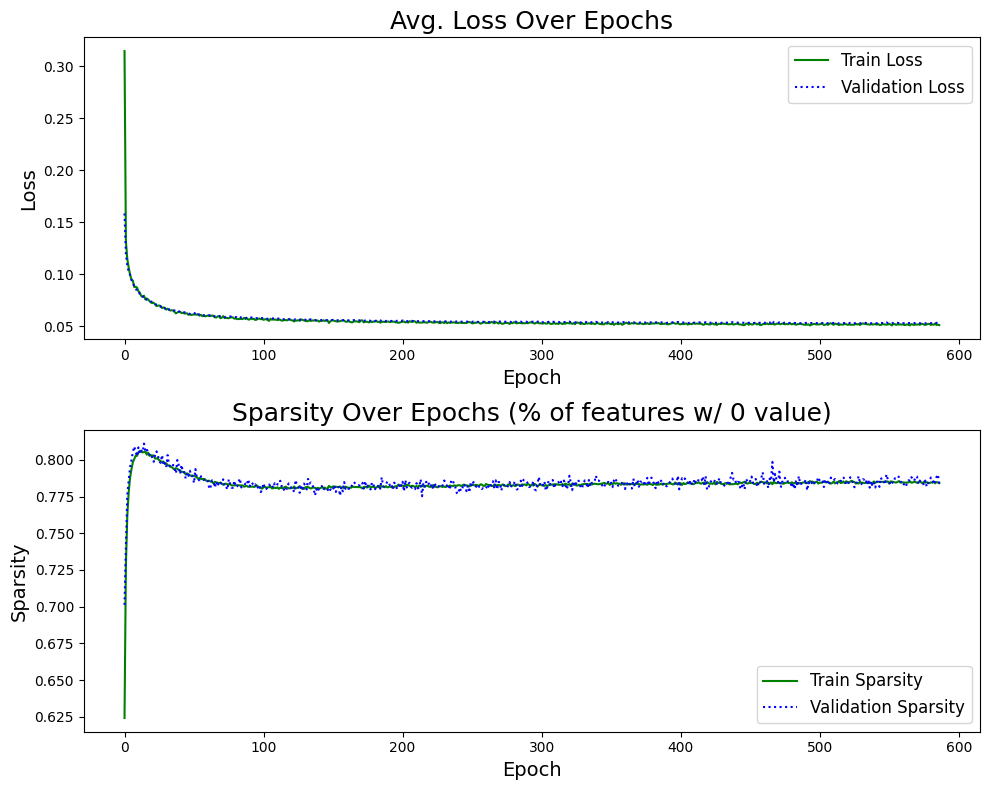

In [47]:
losses_df = pd.read_csv(save_dir + '/losses.csv')

# Creating subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plotting Losses
axes[0].plot(losses_df.index, losses_df['avg_train_losses'], label='Train Loss', color='green')#, marker='o')
axes[0].plot(losses_df.index, losses_df['avg_val_losses'], label='Validation Loss', color='blue', linestyle='dotted')#, marker='s')
axes[0].set_title('Avg. Loss Over Epochs')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plotting Sparsity
axes[1].plot(losses_df.index, losses_df['avg_train_sparcity'], label='Train Sparsity', color='green')#, marker='o')
axes[1].plot(losses_df.index, losses_df['avg_vale_sparcity'], label='Validation Sparsity', color='blue', linestyle='dotted')#, marker='s')
axes[1].set_title('Sparsity Over Epochs (% of features w/ 0 value)')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Sparsity')
axes[1].legend()

plt.tight_layout()
plt.show()


### Calculate and Store SAE Transformations

In [48]:
x_reconstructed, f_hidden= sparse_autoencoder.transform(data_tensor)
adata_scvi.obsm['f_hidden'] = np.array(f_hidden.cpu())
adata_scvi.obsm['f_non_zero'] = adata_scvi.obsm['f_hidden'][:,(adata_scvi.obsm['f_hidden'] >0).sum(axis=0) >0]
adata_scvi.layers['X_reconstructed'] = np.array(x_reconstructed.cpu())

#### UMAP - X_reconstructed

/opt/conda/lib/python3.11/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 128 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.


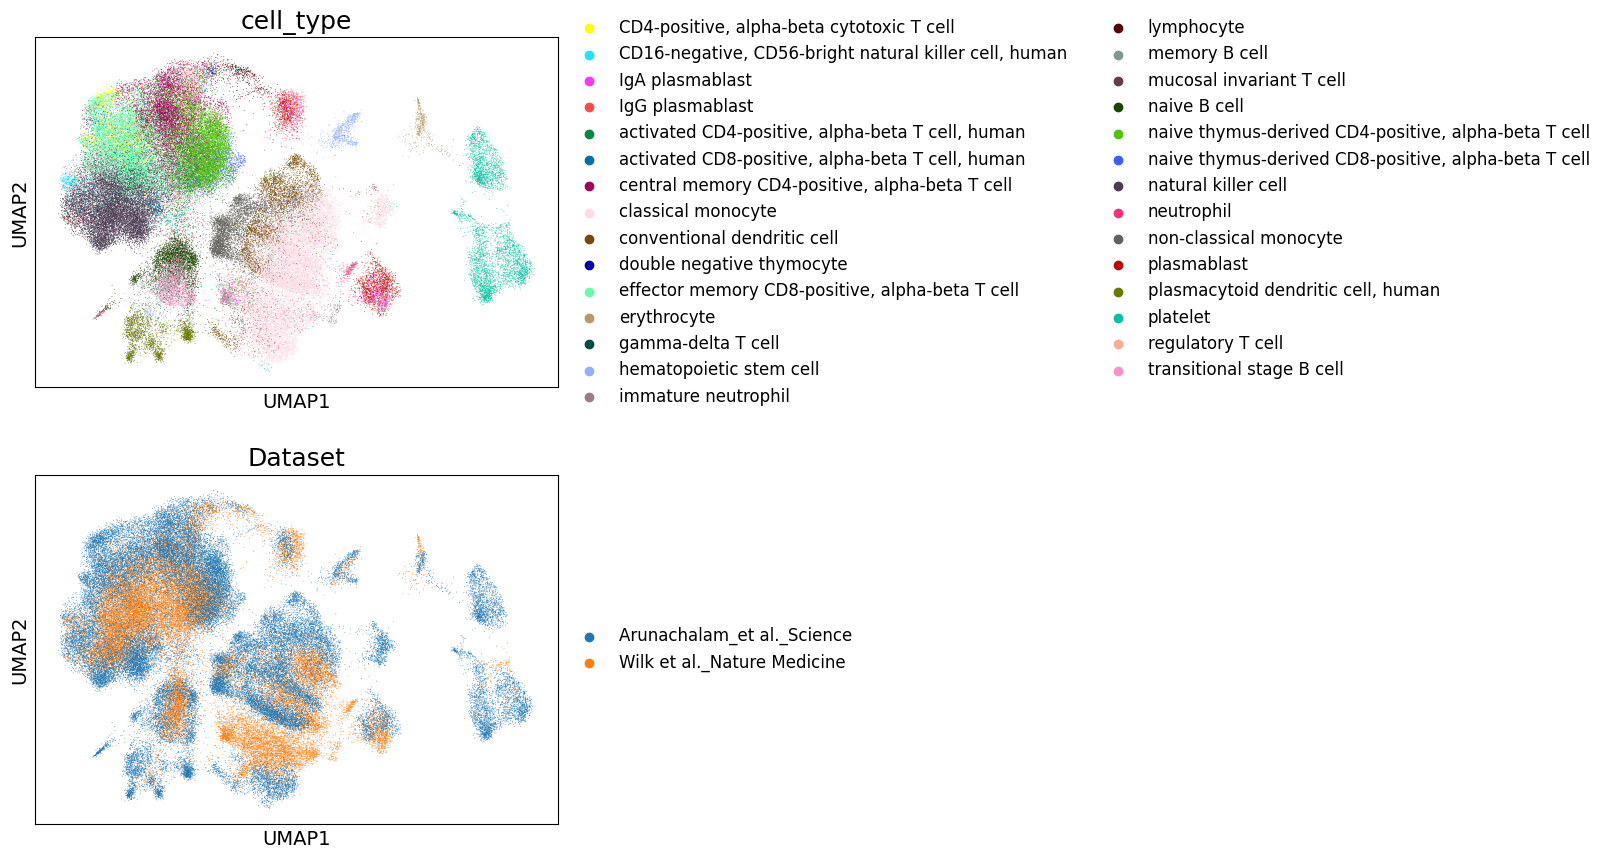

In [49]:
_adata_plotting = ad.AnnData(adata_scvi.layers['X_reconstructed'], adata_scvi.obs)
sc.pp.neighbors(_adata_plotting)
sc.tl.umap(_adata_plotting)
sc.pl.umap(_adata_plotting, color=['cell_type','Dataset'], ncols=1)
del _adata_plotting

#### UMAP - f_hidden

/opt/conda/lib/python3.11/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 2037 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.


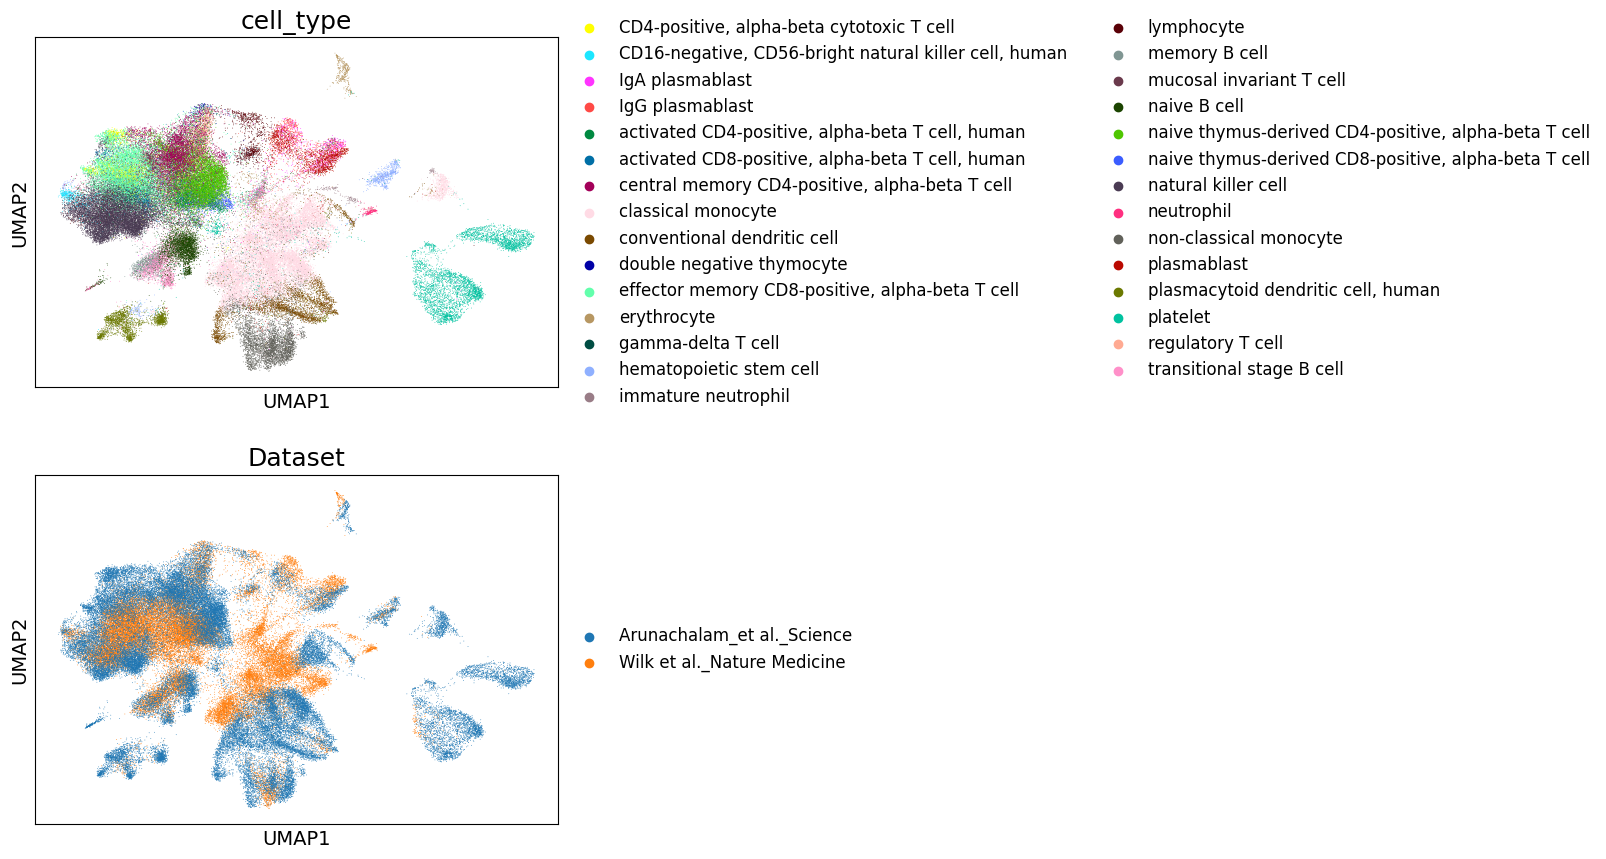

In [50]:
_adata_plotting = ad.AnnData(adata_scvi.obsm['f_non_zero'], adata_scvi.obs)
sc.pp.neighbors(_adata_plotting)
sc.tl.umap(_adata_plotting)
sc.pl.umap(_adata_plotting, color=['cell_type','Dataset'], ncols=1)
del _adata_plotting

### save

In [45]:
adata_scvi.write("./sae_adata.h5ad")